In [4]:
#Проверка шаблона
#см ..\23-09-ХХ Переоценка ДК магазины выст\ReadMe2023-10-18.docx
#
#
#
#

06.11.2023
План код: на входе 1 шаблон 2 Файл прейск, 3 параметры расчета
                   Задание 1 вопрос – проверить соответствие прейскуранта, вставок и поля с замечаниями
                   Задание 2 проверить работу формул шаблона


# imports

In [1]:
import numpy as np
import pandas as pd
import re
import os

In [3]:
import datetime
datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')

'06-11-2023_06-38'

In [2]:
os.listdir('../')

['1 Вводные',
 'del',
 'for_script03-11-2023',
 'for_script17-10-2023',
 'for_script24-10-2023',
 'ipynb',
 'ReadMe2023-10-18.docx',
 '~$adMe2023-09-19.docx',
 '~$adMe2023-10-18.docx',
 'Вставки Родитель1-5 коррекция',
 'Приложение к readme обнаружены несоответствия по номенклатуре 26-09-2023.xlsx',
 'Расчет03-11-2023',
 'Расчет17-10-2023',
 'Расчет24-10-2023',
 'Результаты анализа',
 'шаблон',
 'штрихкод_24-10-2023_16-33.xlsx']

In [4]:
folder_sourse_sh = '..//Расчет03-11-2023/'
folder_res = '../Результаты анализа/'

In [9]:
#модуль для прейскуранта бриллиантов пока не нужен и его нет в папке
#from rusprice.dictdiamonds import dcol_dia, dcla_dia, dpo_dia, dogr_dia_discount
#import rusprice.func_rpdiamonds_xlsx_v2023_1_CARtoKVG as func_rpdiamonds_v2

# Входные данные

## Шаблон

In [5]:
[x for x in enumerate(os.listdir(folder_sourse_sh))]

[(0,
  '~$анализ_все_выгрузка15-10-2023_все_склады_ДК_Шаблон_04-11-2023_2137 .xlsx'),
 (1,
  'анализ_все_выгрузка15-10-2023_все_склады_ДК_Шаблон_04-11-2023_2137 .xlsx'),
 (2, 'архив'),
 (3, 'все_выгрузка15-10-2023_все_склады_ДК_Шаблон_04-11-2023_2137.xlsx'),
 (4, 'резервные копии не менять')]

In [11]:
#06-10-2023 - '25-09-22_18_11 Расчёт цен все ДК склад по шаблону.xlsx'

In [6]:
filename = os.listdir(folder_sourse_sh)[3]
filename

'все_выгрузка15-10-2023_все_склады_ДК_Шаблон_04-11-2023_2137.xlsx'

In [63]:
df0 = pd.read_excel(folder_sourse_sh+filename, dtype={'УИН': str})

In [64]:
#удаляем лишнее перед этим проверка количества
df0.dropna(subset=['Вес'])#'Код в 1С УТ'])

Склад  УИН      Штрихкод  Код в 1С УТ Наименование  \
0           Благовещенск  NaN  2.000002e+12  ЦБ-00200503      Браслет   
1           Благовещенск  NaN  2.000000e+12  ЦБ-00002854      Браслет   
2           Благовещенск  NaN  2.000000e+12  ЦБ-00019951        Брошь   
3           Благовещенск  NaN  2.000000e+12  ЦБ-00019953        Брошь   
4           Благовещенск  NaN  2.000001e+12  ЦБ-00111074        Брошь   
...                  ...  ...           ...          ...          ...   
34264  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00182016  серьги с ДК   
34265  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00182017  серьги с ДК   
34266  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00182019  серьги с ДК   
34267  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00182020  серьги с ДК   
34268  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00182021  серьги с ДК   

                 Артикул Зав. номер  Проба Номенклатурная группа  \
0      JGN00840HGAWX13CH        512  585.0          Т ДМ Юи с ДК   
1               Exl Ш.Н.   30575,51  750.0          Т ДМ Юи с ДК   
2                1БШ0140    1191890  585.0          П ДМ Юи с ДК   
3                 515006       1094  585.0          П ДМ Юи с ДК   
4               15515144        422  585.0          Т ДМ Юи с ДК   
...                  ...        ...    ...                   ...   
34264          121302193   01-12308  585.0          Т ДМ Юи с ДК   
34265          121302193   01-12309  585.0          Т ДМ Юи с ДК   
34266          121562193   01-14045  585.0          Т ДМ Юи с ДК   
34267          121562193   01-14046  585.0          Т ДМ Юи с ДК   
34268          121562193   01-14047  585.0          Т ДМ Юи с ДК   

                                                 Вставки  ...  \
0                                      45КР57-0,520-4/5А  ...   
1      2Кр57-0,083-2/2А 4Кр57-0,084-2/2А 6Кр57-0,280-...  ...   
2                                       1Кр57-0,086-4/5А  ...   
3                                        3Кр57-0,06-4/5А  ...   
4      1Кр57-0,050-4/5А 1Кр57-0,031-6/6А 1Кр57-0,014-...  ...   
...                                                  ...  ...   
34264                           СапфирВ 6КР57-0,080-3/4А  ...   
34265                           СапфирВ 6КР57-0,080-3/4А  ...   
34266                          ИзумрудВ 4КР57-0,040-2/3А  ...   
34267                          ИзумрудВ 4КР57-0,040-2/3А  ...   
34268                          ИзумрудВ 4КР57-0,040-2/3А  ...   

                                  Источник корректировки         Code  \
0      \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00200503   
1      \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00002854   
2      \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00019951   
3      \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00019953   
4      \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00111074   
...                                                  ...          ...   
34264  \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00182016   
34265  \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00182017   
34266  \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00182019   
34267  \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00182020   
34268  \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  ЦБ-00182021   

                                                 vs_dict  ШТУК  КАРАТ  \
0                  [('45', 'КР57', '0,520', '4/5', 'А')]  45.0  0.520   
1      [('2', 'Кр57', '0,083', '2/2', 'А'), ('4', 'Кр...  15.0  0.542   
2                   [('1', 'Кр57', '0,086', '4/5', 'А')]   1.0  0.086   
3                    [('3', 'Кр57', '0,06', '4/5', 'А')]   3.0  0.060   
4      [('1', 'Кр57', '0,050', '4/5', 'А'), ('1', 'Кр...  13.0  0.139   
...                                                  ...   ...    ...   
34264               [('6', 'КР57', '0,080', '3/4', 'А')]   6.0  0.080   
34265               [('6', 'КР57', '0,080', '3/4', 'А')]   6.0  0.080   
34266     

In [65]:
len(_) == 34269 #06-11-2023, 
#len(_) == 33395 #19-10-2023, 
#len(_) == 34528 #06-10-2023, 19-09-2023

True

In [66]:
df0.dropna(subset=['Вес'], inplace=True)#'Код в 1С УТ'])

In [67]:
df0.columns

Index(['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самор

In [68]:
# Проверка уникальности ключа 
len(df0['Код в 1С УТ'].unique()),len(df0)

(34269, 34269)

In [69]:
#Проверка неизменности полей шаблона
all(df0.columns[:41] == ['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самородков по коэфф-му методу',
       'Стоимость ДМ по коэфф-му методу',
       'Стоимость изделия по коэфф-му методу', 'Итого расчётная стоимость',
       'Подходит ли текущая розничная стоимость'])

True

In [330]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34269 entries, 0 to 34268
Data columns (total 71 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Склад                                                  34269 non-null  object        
 1   УИН                                                    0 non-null      object        
 2   Штрихкод                                               34269 non-null  float64       
 3   Код в 1С УТ                                            34269 non-null  object        
 4   Наименование                                           34269 non-null  object        
 5   Артикул                                                34268 non-null  object        
 6   Зав. номер                                             33068 non-null  object        
 7   Проба                                                  34269 non-nu

## Проблема незаполненных - по численным важным не должно быть пусто, должно быть 0

In [332]:
#по шаблону 
df0.columns[:41] 

Index(['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самор

In [331]:
df0[df0['Артикул'].isna()]

Склад  УИН      Штрихкод  Код в 1С УТ Наименование Артикул  \
1039  Выставочный  NaN  2.000002e+12  ЦБ-00204758        Брошь     NaN   

     Зав. номер  Проба Номенклатурная группа                   Вставки  ...  \
1039        NaN  750.0          Т ДМ Юи с ДК  Жемчуг 59КР57-0,333-3/5Б  ...   

     Unnamed: 61 Unnamed: 62 Unnamed: 63       pr_Код  \
1039         NaN         NaN         NaN  ЦБ-00204758   

      pr_Вставки корректировка  pr_prcost  pr_инф для не сработал прейскурант  \
1039  Жемчуг 59КР57-0,333-3/5Б      99.23                            сработал   

      pr_дата корректировки вставки pr_корректировка вставки была  \
1039                     2023-01-01           по файлу 01-01-2023   

                              pr_Источник корректировки  
1039  \\UR-JVV\Users\DAS\Desktop\GM TMP\Analytics\Об...  

[1 rows x 71 columns]

## Считываем Файл прейск

In [26]:
os.listdir('../for_script03-11-2023/')

['выгрузка15-10-2023_все_склады_ДК_04-11-2023_20-48.xlsx',
 'выгрузка15-10-2023_все_склады_ДК__04-11-2023_20-56_diamonds.xlsx',
 'выгрузка15-10-2023_все_склады_ДК__04-11-2023_21-00_res_pr.xlsx']

In [27]:
folder_sourse_pr='../for_script03-11-2023/'

In [28]:
[x for x in enumerate(os.listdir(folder_sourse_pr))]
filename_pr = os.listdir(folder_sourse_pr)[2]
filename_pr

'выгрузка15-10-2023_все_склады_ДК__04-11-2023_21-00_res_pr.xlsx'

In [29]:
dfpr = pd.read_excel(folder_sourse_pr+filename_pr, dtype={'УИН': str})

# Проверка 1 прейск и вставки

## Устранить проблему nan!=nan

In [80]:
dfpr[[ 'prcost', 'Вставки корректировка']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34269 entries, 0 to 34268
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prcost                 34269 non-null  float64
 1   Вставки корректировка  34269 non-null  object 
dtypes: float64(1), object(1)
memory usage: 535.6+ KB


In [53]:
dfpr.loc[dfpr[ 'prcost'].isna(),'prcost'] = 0

In [54]:
dfpr.loc[dfpr[ 'Вставки корректировка'].isna(),'Вставки корректировка']# = 0

Series([], Name: Вставки корректировка, dtype: object)

In [83]:
df0[['Прейскурантная стоимость бриллиантов, $','Вставки']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34269 entries, 0 to 34268
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Прейскурантная стоимость бриллиантов, $  34269 non-null  float64
 1   Вставки                                  34269 non-null  object 
dtypes: float64(1), object(1)
memory usage: 803.2+ KB


In [70]:
df0.loc[df0['Прейскурантная стоимость бриллиантов, $'].isna(),'Прейскурантная стоимость бриллиантов, $'] = 0

## merge

In [71]:
dfpr.columns

Index(['Unnamed: 0', 'Код', 'Старый код (Справочник "Номенклатура" (Общие))',
       'Склад', 'Склад.Склад / Магазин',
       'Вставки (Справочник "Номенклатура" (Общие))', 'Вид номенклатуры',
       'Тип номенклатуры', 'Номенклатура', 'Группа',
       'Заводской номер (Справочник "Номенклатура" (Общие))',
       'Проба (Справочник "Номенклатура" (Общие))',
       'Цвет металла (Справочник "Номенклатура" (Общие))',
       'Дизайн (Справочник "Номенклатура" (Общие))', 'Артикул ',
       'Размерная группа Центрального камня (Справочник "Номенклатура" (Общие))',
       'Цвет Центрального Камня (Справочник "Номенклатура" (Общие))',
       'Чистота Центрального Камня (Справочник "Номенклатура" (Общие))',
       'Размер (Справочник "Номенклатура" (Общие))', 'Наименование для печати',
       'Единица измерения веса',
       'Вес Вставок ПДК (Карат) (Справочник "Номенклатура" (Общие))',
       'Кол-во ДК (Справочник "Номенклатура" (Общие))',
       'Вес Вставок ДК (Карат) (Справочник "Номенкла

In [72]:
dfpr_min = dfpr[['Код', 'Вставки корректировка', 'prcost', 'инф для не сработал прейскурант', 'дата корректировки вставки',
       'корректировка вставки была', 'Источник корректировки']]

In [73]:
dfpr_min.columns = [f"pr_{x}" for x in dfpr_min.columns]
dfpr_min.columns

Index(['pr_Код', 'pr_Вставки корректировка', 'pr_prcost',
       'pr_инф для не сработал прейскурант', 'pr_дата корректировки вставки',
       'pr_корректировка вставки была', 'pr_Источник корректировки'],
      dtype='object')

In [74]:
df0.columns

Index(['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самор

In [75]:
df0 = pd.merge(left=df0, right=dfpr_min,
         how='left', left_on='Код в 1С УТ', right_on='pr_Код')

In [76]:
(~(df0 ['Прейскурантная стоимость бриллиантов, $']== df0['pr_prcost'])).sum()

0

In [77]:
df0[(~(df0 ['Прейскурантная стоимость бриллиантов, $']== df0['pr_prcost']))][[ 'Прейскурантная стоимость бриллиантов, $','pr_prcost']]

Empty DataFrame
Columns: [Прейскурантная стоимость бриллиантов, $, pr_prcost]
Index: []

In [79]:
(~(df0 ['Вставки']== df0['pr_Вставки корректировка'])).sum().T

0

# Повтор основных вычислений шаблона для контроля

## Параметры

In [151]:
parf = pd.read_excel(folder_sourse_sh+filename, sheet_name='Параметры', header=2).head(1).T.dropna().to_dict()[0]
parf

{'Параметр': 'Значение',
 'Курс доллара': 72.1,
 'Цена 1 гр аффинированного золота': 4300,
 'Цена 1 гр аффинированного серебра': 57,
 'Цена 1 гр аффинированной платины': 2600,
 'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости': 2,
 'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости': 2.5,
 'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости': 1.5,
 'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости': 3,
 'Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости': 1.7}

In [152]:
par = {'Параметр': 'Значение',
 'Курс доллара': 72.1,
 'Цена 1 гр аффинированного золота': 4300,
 'Цена 1 гр аффинированного серебра': 57,
 'Цена 1 гр аффинированной платины': 2600,
 'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости': 2,
 'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости': 2.5,
 'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости': 1.5,
 'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости': 3,
 'Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости': 1.7}


In [164]:
 par == parf

True

### Если не изменилось

In [160]:
#Проверка на изменение параметров, если не изменилось сразу назначаются упрощенные параметры
if par == parf:
    pars = {'Параметр': 'Значение',
     'Курс_доллара': 72.1,
     'Цена_аф_золота': 4300,
     'Цена_аф_серебра': 57,
     'Цена_aф_платины': 2600,
     'К_аф_ДМ': 2,
     'К_пр_брил_розн': 2.5,
     'К_пр_ЦвДК': 1.5,
     'К_самородков': 3,
     'К_пр_бр_сырьевой_стоимости': 1.7}


In [161]:
pars

{'Параметр': 'Значение',
 'Курс_доллара': 72.1,
 'Цена_аф_золота': 4300,
 'Цена_аф_серебра': 57,
 'Цена_aф_платины': 2600,
 'К_аф_ДМ': 2,
 'К_пр_брил_розн': 2.5,
 'К_пр_ЦвДК': 1.5,
 'К_самородков': 3,
 'К_пр_бр_сырьевой_стоимости': 1.7}

In [163]:
dic_simple_par = {'Параметр': 'Параметр',
 'Курс доллара': 'Курс_доллара',
 'Цена 1 гр аффинированного золота': 'Цена_аф_золота',
 'Цена 1 гр аффинированного серебра': 'Цена_аф_серебра',
 'Цена 1 гр аффинированной платины': 'Цена_aф_платины',
 'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости': 'К_аф_ДМ',
 'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости': 'К_пр_брил_розн',
 'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости': 'К_пр_ЦвДК',
 'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости': 'К_самородков',
 'Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости': 'К_пр_бр_сырьевой_стоимости'}

### Если изменилось последовательный сбор параметров и упрощение (пропустить к ## Данные)

In [154]:
pd.read_excel(folder_sourse_sh+filename, sheet_name='Параметры', header=2).head(1)

Параметр Курс доллара Цена 1 гр аффинированного золота  \
0  Значение         72.1                             4300   

  Цена 1 гр аффинированного серебра Цена 1 гр аффинированной платины  \
0                                57                             2600   

  Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости  \
0                                                  2                                 

  Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости  \
0                                                2.5                                                   

  Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости  \
0                                                1.5                                            

  Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости  \
0                                                  3                                            

  Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости  \
0                                                1.7                                              

   Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  
0          NaN          NaN          NaN          NaN          NaN

In [155]:
_.T

0
Параметр                                            Значение
Курс доллара                                            72.1
Цена 1 гр аффинированного золота                        4300
Цена 1 гр аффинированного серебра                         57
Цена 1 гр аффинированной платины                        2600
Коэффициент на аффинажную цену ДМ для расчёта п...         2
Коэффициент на прейскурантную стоимость бриллиа...       2.5
Коэффициент на прейскурантную стоимость ЦвДК дл...       1.5
Коэффициент на  стоимость золотых самородков дл...         3
Коэффициент на прейскурантную стоимость  брилли...       1.7
Unnamed: 10                                              NaN
Unnamed: 11                                              NaN
Unnamed: 12                                              NaN
Unnamed: 13                                              NaN
Unnamed: 14                                              NaN

In [156]:
_.dropna()

0
Параметр                                            Значение
Курс доллара                                            72.1
Цена 1 гр аффинированного золота                        4300
Цена 1 гр аффинированного серебра                         57
Цена 1 гр аффинированной платины                        2600
Коэффициент на аффинажную цену ДМ для расчёта п...         2
Коэффициент на прейскурантную стоимость бриллиа...       2.5
Коэффициент на прейскурантную стоимость ЦвДК дл...       1.5
Коэффициент на  стоимость золотых самородков дл...         3
Коэффициент на прейскурантную стоимость  брилли...       1.7

In [157]:
_.to_dict()

{0: {'Параметр': 'Значение',
  'Курс доллара': 72.1,
  'Цена 1 гр аффинированного золота': 4300,
  'Цена 1 гр аффинированного серебра': 57,
  'Цена 1 гр аффинированной платины': 2600,
  'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости': 2,
  'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости': 2.5,
  'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости': 1.5,
  'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости': 3,
  'Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости': 1.7}}

In [132]:
#parf = _[0]

In [133]:
parf

{'Параметр': 'Значение',
 'Курс доллара': 72.1,
 'Цена 1 гр аффинированного золота': 4300,
 'Цена 1 гр аффинированного серебра': 57,
 'Цена 1 гр аффинированной платины': 2600,
 'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости': 2,
 'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости': 2.5,
 'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости': 1.5,
 'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости': 3,
 'Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости': 1.7}

In [134]:
parf.keys()

dict_keys(['Параметр', 'Курс доллара', 'Цена 1 гр аффинированного золота', 'Цена 1 гр аффинированного серебра', 'Цена 1 гр аффинированной платины', 'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости', 'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости', 'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости', 'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости', 'Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости'])

In [ ]:
### Упростить название параметров

In [158]:
for k in parf.keys():
    print(f"'{k}':'{k}';")

'Параметр':'Параметр';
'Курс доллара':'Курс доллара';
'Цена 1 гр аффинированного золота':'Цена 1 гр аффинированного золота';
'Цена 1 гр аффинированного серебра':'Цена 1 гр аффинированного серебра';
'Цена 1 гр аффинированной платины':'Цена 1 гр аффинированной платины';
'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости':'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости';
'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости':'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости';
'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости':'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости';
'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости':'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розни

In [138]:
dic_simple_par = { 'Параметр':'Параметр',
 'Курс доллара':'Курс_доллара',
 'Цена 1 гр аффинированного золота':'Цена_аф_золота',
 'Цена 1 гр аффинированного серебра':'Цена_аф_серебра',
 'Цена 1 гр аффинированной платины':'Цена_aф_платины',
 'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости':'К_аф_ДМ',
 'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости':'К_пр_брил_розн',
 'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости':'К_пр_ЦвДК',
 'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости':'К_самородков',
 'Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости':'К_пр_бр_сырьевой_стоимости',
                 }

In [139]:
dic_simple_par

{'Параметр': 'Параметр',
 'Курс доллара': 'Курс_доллара',
 'Цена 1 гр аффинированного золота': 'Цена_аф_золота',
 'Цена 1 гр аффинированного серебра': 'Цена_аф_серебра',
 'Цена 1 гр аффинированной платины': 'Цена_aф_платины',
 'Коэффициент на аффинажную цену ДМ для расчёта предполагаемой розничной стоимости': 'К_аф_ДМ',
 'Коэффициент на прейскурантную стоимость бриллиантов для расчёта предполагаемой розничной стоимости': 'К_пр_брил_розн',
 'Коэффициент на прейскурантную стоимость ЦвДК для расчёта предполагаемой розничной стоимости': 'К_пр_ЦвДК',
 'Коэффициент на  стоимость золотых самородков для расчёта предполагаемой розничной стоимости': 'К_самородков',
 'Коэффициент на прейскурантную стоимость  бриллиантов для расчёта примерной сырьевой стоимости': 'К_пр_бр_сырьевой_стоимости'}

In [140]:
pars=dict()
for k,v in par.items():
    print(dic_simple_par[k], v)
    pars[dic_simple_par[k]]=v

Параметр Значение
Курс_доллара 72.1
Цена_аф_золота 4300
Цена_аф_серебра 57
Цена_aф_платины 2600
К_аф_ДМ 2
К_пр_брил_розн 2.5
К_пр_ЦвДК 1.5
К_самородков 3
К_пр_бр_сырьевой_стоимости 1.7


In [159]:
pars

{'Параметр': 'Значение',
 'Курс_доллара': 72.1,
 'Цена_аф_золота': 4300,
 'Цена_аф_серебра': 57,
 'Цена_aф_платины': 2600,
 'К_аф_ДМ': 2,
 'К_пр_брил_розн': 2.5,
 'К_пр_ЦвДК': 1.5,
 'К_самородков': 3,
 'К_пр_бр_сырьевой_стоимости': 1.7}

## Данные

In [165]:
#Проверка неизменности полей шаблона
all(df0.columns[:41] == ['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самородков по коэфф-му методу',
       'Стоимость ДМ по коэфф-му методу',
       'Стоимость изделия по коэфф-му методу', 'Итого расчётная стоимость',
       'Подходит ли текущая розничная стоимость'])

True

In [166]:
#словарь упрощения назовем коротко и будем применять каждый раз, без размножения данных dicd

In [167]:
for k in df0.columns[:41]:
    print(f"'{k}':'{k}';")

'Склад':'Склад';
'УИН':'УИН';
'Штрихкод':'Штрихкод';
'Код в 1С УТ':'Код в 1С УТ';
'Наименование':'Наименование';
'Артикул':'Артикул';
'Зав. номер':'Зав. номер';
'Проба':'Проба';
'Номенклатурная группа':'Номенклатурная группа';
'Вставки':'Вставки';
'Поставщик':'Поставщик';
'Договор':'Договор';
'Партия':'Партия';
'Накладная':'Накладная';
'Кол':'Кол';
'Вес':'Вес';
'Учётная стоимость':'Учётная стоимость';
'Текущая розничная стоимость':'Текущая розничная стоимость';
'Есть ли препятствия применению коэффициентного метода':'Есть ли препятствия применению коэффициентного метода';
'Прейскурантная стоимость бриллиантов, $':'Прейскурантная стоимость бриллиантов, $';
'Прейскурантная стоимость ЦвДК, $':'Прейскурантная стоимость ЦвДК, $';
'Вес самородков суммированный, г':'Вес самородков суммированный, г';
'РасчПЭУ':'РасчПЭУ';
'Наценка ПЭУ, со скидкой':'Наценка ПЭУ, со скидкой';
'Расчётная скидка':'Расчётная скидка';
'Предлагаемая ГМ розничная стоимость':'Предлагаемая ГМ розничная стоимость';
'Нацен

In [ ]:
dicd={'Склад':'Склад';
'УИН':'УИН';
'Штрихкод':'Штрихкод';
'Код в 1С УТ':'Код в 1С УТ';
'Наименование':'Наименование';
'Артикул':'Артикул';
'Зав. номер':'Зав. номер';
'Проба':'Проба';
'Номенклатурная группа':'Номенклатурная группа';
'Вставки':'Вставки';
'Поставщик':'Поставщик';
'Договор':'Договор';
'Партия':'Партия';
'Накладная':'Накладная';
'Кол':'Кол';
'Вес':'Вес';
'Учётная стоимость':'Учётная стоимость';
'Текущая розничная стоимость':'Текущая розничная стоимость';
'Есть ли препятствия применению коэффициентного метода':'Есть ли препятствия применению коэффициентного метода';
'Прейскурантная стоимость бриллиантов, $':'Прейскурантная стоимость бриллиантов, $';
'Прейскурантная стоимость ЦвДК, $':'Прейскурантная стоимость ЦвДК, $';
'Вес самородков суммированный, г':'Вес самородков суммированный, г';
'РасчПЭУ':'РасчПЭУ';
'Наценка ПЭУ, со скидкой':'Наценка ПЭУ, со скидкой';
'Расчётная скидка':'Расчётная скидка';
'Предлагаемая ГМ розничная стоимость':'Предлагаемая ГМ розничная стоимость';
'Наценка, со скидкой':'Наценка, со скидкой';
'Цена за грамм, со скидкой, округлённая':'Цена за грамм, со скидкой, округлённая';
'Изменение цены':'Изменение цены';
'Механизм ценообразования':'Механизм ценообразования';
'Можно ли пересматривать цену (нет, если МИЗО)':'Можно ли пересматривать цену (нет, если МИЗО)';
'Пороговая наценка, со скдикой':'Пороговая наценка, со скдикой';
'Пороговая цена за грамм, со скидкой':'Пороговая цена за грамм, со скидкой';
'Стоимость исходя из пороговой наценки':'Стоимость исходя из пороговой наценки';
'Стоимость исходя из пороговой цены за грамм':'Стоимость исходя из пороговой цены за грамм';
'Стоимость ДК по коэфф-му методу':'Стоимость ДК по коэфф-му методу';
'Стоимость самородков по коэфф-му методу':'Стоимость самородков по коэфф-му методу';
'Стоимость ДМ по коэфф-му методу':'Стоимость ДМ по коэфф-му методу';
'Стоимость изделия по коэфф-му методу':'Стоимость изделия по коэфф-му методу';
'Итого расчётная стоимость':'Итого расчётная стоимость';
'Подходит ли текущая розничная стоимость':'Подходит ли текущая розничная стоимость}

## Функции для расчетов

In [319]:


def ras_skidka(x):
#x['Расчётная скидка']=ЕСЛИ(ЕЧИСЛО(ПОИСК("ПДК";I2));50%;ЕСЛИ(K2="МИЗО";30%;40%))
    using_datas = ['Номенклатурная группа', 'Поставщик']
    if x['Номенклатурная группа'].__contains__('ПДК'):
        return 0.5
    elif x[ 'Поставщик'].lower().__contains__('мизо'):
        return 0.3
        
    else:
        return 0.4
    
def st_dk_koem(x): 
#x['Стоимость ДК по коэфф-му методу'] =(T1019*Параметры!$G$4+U1019*Параметры!$H$4)*Параметры!$B$4*1.2/(1-Y1019)
    using_datas = ['Прейскурантная стоимость бриллиантов, $','Прейскурантная стоимость ЦвДК, $']
    #x[using_datas] =x[using_datas].fillna(0)
    x =x.fillna(0)
    return (x['Прейскурантная стоимость бриллиантов, $'] * pars['К_пр_брил_розн']+\
            x['Прейскурантная стоимость ЦвДК, $']*pars['К_пр_ЦвДК'])\
            *pars['Курс_доллара']*1.2/(1-x['Расчётная скидка'])

    
def st_dm_koem(x): 
#x['Стоимость ДМ по коэфф-му методу'] ==(P2-V2)*H2/1000*ЕСЛИ(H2<=750;Параметры!$C$4;
#               ЕСЛИ(H2=950;Параметры!$E$4;Параметры!$D$4))*Параметры!$F$4*1.2/(1-Y2)
    using_datas = ['Проба','Вес','Вес самородков суммированный, г','Номенклатурная группа']
    #x[using_datas] =x[using_datas].fillna(0)
    x =x.fillna(value={'Вес самородков суммированный, г':0})
    golda = (x['Вес']-x['Вес самородков суммированный, г']) * x['Проба']/1000
    if x['Проба']<=750:
        cena_a = pars[ 'Цена_аф_золота']
    elif x['Проба']==950 and x['Номенклатурная группа'].lower().__contains__('дм юи с дк'):
        cena_a = pars['Цена_aф_платины']
    elif  x['Проба']==925 and x['Номенклатурная группа'].lower().__contains__('сер'):
        cena_a = pars['Цена_аф_серебра']
    else:
        raise ValueError("my error - probe st_dm_koem")
    return golda*cena_a*pars['К_аф_ДМ']*1.2/(1-x['Расчётная скидка'])

def st_koem(x):
#Стоимость изделия по коэфф-му методу =ОКРУГЛВВЕРХ(AJ9243+AK9243+AL9243;0)
    return math.ceil(st_dm_koem(x)+st_dk_koem(x))

def st_porog_naz(x):#для простоты пока Пороговая наценка, со скдикой32%
#Стоимость исходя из пороговой наценки
#=ОКРУГЛВВЕРХ((Q9243*(1+AF9243)*1.2)/(1-Y9243);0)
#
    import math
    porog_naz=0.32
    return int(math.ceil(x['Учётная стоимость']*(1+porog_naz)*1.2/(1-x['Расчётная скидка'])))

def z_porog_zagr(x):
#Пороговая цена за грамм, со скидкой

#=ЕСЛИ(H9243=925;
#     6000;
#     ЕСЛИ(ЕЧИСЛО(ПОИСК("ПДК";I9243));
#         ЕСЛИ(H9243<=585;
#             7780;
#             10360)*1.2*(1-Y9243);
#         ЕСЛИ(ЕЧИСЛО(ПОИСК("Сам";I9243));
#             ЕСЛИ(H9243<=585;
#                 8400;
#                 10080);
#             ЕСЛИ(H9243<=585;
#                 7000;
#                 ЕСЛИ(ИЛИ(H9243=750;H9243=950);
#                     8400;
#                     0)))))
  
    
#
    
    if x['Проба']==925:#ЕСЛИ(H3=925;  
        z_zagr=6000         #6000;
    else:
        if x['Номенклатурная группа'].lower().__contains__('пдк'): #ЕСЛИ(ЕЧИСЛО(ПОИСК("ПДК";I3));
            if x['Проба']<=585: #ЕСЛИ(H3<=585;
                z_zagr=7780*1.2*(1-x['Расчётная скидка']) #7780;
            else:
                z_zagr=10360*1.2*(1-x['Расчётная скидка']) #10360)*1.2*(1-Y3); 
        else:
            if  x['Номенклатурная группа'].lower().__contains__('сам'): #ЕСЛИ(ЕЧИСЛО(ПОИСК("Сам";I3));
                if x['Проба']<=585: #ЕСЛИ(H3<=585;
                    z_zagr=8400 #8400;
                else:
                    z_zagr=10080 #10080);
            else:
                if x['Проба']<=585: #ЕСЛИ(H3<=585;
                    z_zagr=7000 #7000;
                else:
                    if x['Проба']==750 or x['Проба']==950: #ЕСЛИ(ИЛИ(H3=750;H3=950);
                        z_zagr=8400 #8400;
                    else:
                        z_zagr=0 #0))))):
    return z_zagr

def st_porog_zagr(x):
#  =ОКРУГЛВВЕРХ(AG3094*P3094/(1-Y3094);0)                     
#  Стоимость исходя из пороговой цены за грамм
    return math.ceil(x['Вес']*z_porog_zagr(x)/(1-x['Расчётная скидка']))

            
        


In [ ]:
#=ЕСЛИ(H9243=925;6000;ЕСЛИ(ЕЧИСЛО(ПОИСК("ПДК";I9243));
#ЕСЛИ(H9243<=585;7780;10360)*1.2*(1-Y9243);ЕСЛИ(ЕЧИСЛО(ПОИСК("Сам";I9243));
#ЕСЛИ(H9243<=585;8400;10080);ЕСЛИ(H9243<=585;7000;ЕСЛИ(ИЛИ(H9243=750;H9243=950);8400;0)))))
    

In [318]:
df0.columns['abcdefghijklmnopqrstuvwxyz'.index('p')]

'Вес'

{'Параметр': 'Значение',
 'Курс_доллара': 72.1,
 'Цена_аф_золота': 4300,# Параметры!$C$4
 'Цена_аф_серебра': 57, #Параметры!$D$4
 'Цена_aф_платины': 2600,# Параметры!$E$4
 'К_аф_ДМ': 2, Параметры!$F$4
 'К_пр_брил_розн': 2.5,
 'К_пр_ЦвДК': 1.5,
 'К_самородков': 3,
 'К_пр_бр_сырьевой_стоимости': 1.7}

In [263]:
'ДМ Юи с ДК'.lower()

'дм юи с дк'

In [192]:
pars

{'Параметр': 'Значение',
 'Курс_доллара': 72.1,
 'Цена_аф_золота': 4300,
 'Цена_аф_серебра': 57,
 'Цена_aф_платины': 2600,
 'К_аф_ДМ': 2,
 'К_пр_брил_розн': 2.5,
 'К_пр_ЦвДК': 1.5,
 'К_самородков': 3,
 'К_пр_бр_сырьевой_стоимости': 1.7}

## Проверка поля скидка, проба, 

In [252]:
#Полнота данных  non-null
df0[['Номенклатурная группа', 'Поставщик', 'Расчётная скидка','Проба',
'Кол','Вес']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34269 entries, 0 to 34268
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Номенклатурная группа  34269 non-null  object 
 1   Поставщик              34269 non-null  object 
 2   Расчётная скидка       34269 non-null  float64
 3   Проба                  34269 non-null  float64
 4   Кол                    34269 non-null  float64
 5   Вес                    34269 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.8+ MB


In [253]:
df0['Проба'].unique()#,,

array([585., 750., 500., 925., 950.])

In [254]:
df0['Расчётная скидка'].unique()#,'Проба',

array([0.4, 0.3])

In [255]:
#Проверка ПДК -50%
(df0[['Номенклатурная группа','Поставщик']].apply(ras_skidka, axis=1).astype('str')\
    +' '+df0['Номенклатурная группа']).unique()

array(['0.4 Т ДМ Юи с ДК', '0.4 П ДМ Юи с ДК', '0.3 П ДМ Юи с ДК',
       '0.4 Т ДМ Юи Каст ДК', '0.4 П ДМ Юи Каст ДК',
       '0.4 Т ДМ Юи сер. с ДК'], dtype=object)

In [256]:
#по мизо - должно быть так - ['0.4 не мизо', '0.3 МИЗО']
(df0[['Номенклатурная группа','Поставщик']].apply(ras_skidka, axis=1).astype('str')\
 +' '+df0.apply(lambda x: 'МИЗО' if x['Поставщик']=='МИЗО' else 'не мизо', axis=1)).unique()

array(['0.4 не мизо', '0.3 МИЗО'], dtype=object)

## 'Стоимость по коэфф-му методу'

In [257]:
all(df0.apply(st_dk_koem, axis=1)==df0['Стоимость ДК по коэфф-му методу'])

True

In [258]:
df0['Стоимость ДК по коэфф-му методу'] - df0.apply(st_dk_koem, axis=1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34264    0.0
34265    0.0
34266    0.0
34267    0.0
34268    0.0
Length: 34269, dtype: float64

In [259]:
_.sum()

0.0

In [278]:
#x['Стоимость ДМ по коэфф-му методу']
df0['Стоимость ДМ по коэфф-му методу'] - df0.apply(st_dm_koem, axis=1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34264    0.0
34265    0.0
34266    0.0
34267    0.0
34268    0.0
Length: 34269, dtype: float64

In [279]:
_.sum()

0.0

In [285]:
#Стоимость изделия по коэфф-му методу =ОКРУГЛВВЕРХ(AJ9243+AK9243+AL9243;0)
df0['Стоимость изделия по коэфф-му методу'] - df0.apply(st_koem, axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
34264    0
34265    0
34266    0
34267    0
34268    0
Length: 34269, dtype: int64

In [283]:
_.sum()

2

## Стоимость исходя из пороговой наценки

In [300]:
#Стоимость исходя из пороговой наценки
#=ОКРУГЛВВЕРХ((Q9243*(1+AF9243)*1.2)/(1-Y9243);0)
#Пороговая наценка, со скдикой
#32%
df0['Стоимость исходя из пороговой наценки'] - df0.apply(st_porog_naz, axis=1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34264    0.0
34265    0.0
34266    0.0
34267    0.0
34268    0.0
Length: 34269, dtype: float64

In [301]:
_.max(), _.min(), _.sum()

(0.0, -1.0, -12.0)

In [302]:
df0[df0['Стоимость исходя из пороговой наценки'] != df0.apply(st_porog_naz, axis=1)]\
 ['Стоимость исходя из пороговой наценки']

1781     121968.0
2222     236016.0
3253     124608.0
4433     115698.0
4836     119328.0
7725     461472.0
7734     127248.0
9321      29832.0
16336    115698.0
18026    246246.0
21749    114048.0
26212     14916.0
Name: Стоимость исходя из пороговой наценки, dtype: float64

In [304]:
(df0.apply(st_porog_naz, axis=1).astype('str')+'--'+df0['Стоимость исходя из пороговой наценки'].astype('str'))[df0['Стоимость исходя из пороговой наценки'] != df0.apply(st_porog_naz, axis=1)]

1781     121969--121968.0
2222     236017--236016.0
3253     124609--124608.0
4433     115699--115698.0
4836     119329--119328.0
7725     461473--461472.0
7734     127249--127248.0
9321       29833--29832.0
16336    115699--115698.0
18026    246247--246246.0
21749    114049--114048.0
26212      14917--14916.0
dtype: object

## Стоимость исходя из 'Пороговая цена за грамм, со скидкой'

In [ ]:
#Пороговая цена за грамм, со скидкой
#=ЕСЛИ(H9243=925;6000;ЕСЛИ(ЕЧИСЛО(ПОИСК("ПДК";I9243));ЕСЛИ(H9243<=585;7780;10360)*1.2*(1-Y9243);ЕСЛИ(ЕЧИСЛО(ПОИСК("Сам";I9243));ЕСЛИ(H9243<=585;8400;10080);ЕСЛИ(H9243<=585;7000;ЕСЛИ(ИЛИ(H9243=750;H9243=950);8400;0)))))

In [316]:
#Пороговая цена за грамм, со скидкой
df0['Пороговая цена за грамм, со скидкой'] - df0.apply(z_porog_zagr, axis=1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34264    0.0
34265    0.0
34266    0.0
34267    0.0
34268    0.0
Length: 34269, dtype: float64

In [317]:
_.sum()

0.0

In [322]:
#  Стоимость исходя из пороговой цены за грамм
df0['Стоимость исходя из пороговой цены за грамм'] - df0.apply(st_porog_zagr, axis=1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34264    0.0
34265    0.0
34266    0.0
34267    0.0
34268    0.0
Length: 34269, dtype: float64

In [323]:
_.sum()

-679.0

In [325]:
df0[df0['Стоимость исходя из пороговой цены за грамм'] != df0.apply(st_porog_zagr, axis=1)]

Склад  УИН      Штрихкод  Код в 1С УТ Наименование  \
44          Благовещенск  NaN  2.000000e+12  ЦБ-00019609       Кольцо   
98          Благовещенск  NaN  2.000000e+12  ЦБ-00019678       Кольцо   
235         Благовещенск  NaN  2.000000e+12  ЦБ-00019903       Кольцо   
239         Благовещенск  NaN  2.000000e+12  ЦБ-00019907       Кольцо   
328         Благовещенск  NaN  2.000001e+12  ЦБ-00073098       Кольцо   
...                  ...  ...           ...          ...          ...   
34095  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00200357       Серьги   
34100  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00200643       Серьги   
34101  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00200657       Серьги   
34107  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00200739       Серьги   
34117  Ювелирные изделия  NaN  2.000002e+12  ЦБ-00201586       Серьги   

                 Артикул Зав. номер  Проба Номенклатурная группа  \
44               ZFR1444      1/182  585.0          Т ДМ Юи с ДК   
98               1К01651    7841.51  585.0          Т ДМ Юи с ДК   
235            17/511068        364  585.0          П ДМ Юи с ДК   
239             2К011302    3194,91  585.0          Т ДМ Юи с ДК   
328            17521068м       6067  585.0          П ДМ Юи с ДК   
...                  ...        ...    ...                   ...   
34095  JEO021505GAWX13XX        366  585.0          Т ДМ Юи с ДК   
34100  JES465501GAWX13XX        652  585.0          Т ДМ Юи с ДК   
34101  JES465501GAWX13XX        666  585.0          Т ДМ Юи с ДК   
34107  JES465501GAWX13XX        749  585.0          Т ДМ Юи с ДК   
34117  JES465501GAWX13XX        674  585.0          Т ДМ Юи с ДК   

                                 Вставки  ... Unnamed: 61 Unnamed: 62  \
44               ТопазГ 52Кр57-0,31-4/5А  ...         NaN         NaN   
98                     13Кр57-0,302-2/2А  ...         NaN         NaN   
235                      1Кр57-0,16-4/5А  ...         NaN         NaN   
239    1Кр57-0,16-3/4А 12Кр57-0,113-2/4А  ...         NaN         NaN   
328                     1КР57-0,140-2/5А  ...         NaN         NaN   
...                                  ...  ...         ...         ...   
34095                   2КР57-0,080-4/5А  ...         NaN         NaN   
34100                   2КР57-0,050-4/5А  ...         NaN         NaN   
34101                   2КР57-0,050-4/5А  ...         NaN         NaN   
34107                   2КР57-0,050-4/5А  ...         NaN         NaN   
34117                   2КР57-0,050-4/5А  ...         NaN         NaN   

      Unnamed: 63       pr_Код           pr_Вставки корректировка  pr_prcost  \
44            NaN  ЦБ-00019609            ТопазГ 52Кр57-0,31-4/5А      99.20   
98            NaN  ЦБ-00019678                  13Кр57-0,302-2/2А     132.88   
235           NaN  ЦБ-00019903                    1Кр57-0,16-4/5А      86.40   
239           NaN  ЦБ-00019907  1Кр57-0,16-3/4А 12Кр57-0,113-2/4А     162.10   
328           NaN  ЦБ-00073098                   1КР57-0,140-2/5А      86.80   
...           ...          ...                                ...        ...   
34095         NaN  ЦБ-00200357                   2КР57-0,080-4/5А      22.40   
34100         NaN  ЦБ-00200643                   2КР57-0,050-4/5А      14.50   
34101         NaN  ЦБ-00200657                   2КР57-0,050-4/5А      14.50   
34107         NaN  ЦБ-00200739                   2КР57-0,050-4/5А      14.50   
34117         NaN  ЦБ-00201586                   2КР57-0,050-4/5А      14.50   

       pr_инф для не сработал прейскурант  pr_дата корректировки вставки  \
44                               сработал                     2023-01-01   
98                               сработал                     2023-01-01   
235                              сработал                     2023-01-01   
239                              сработал                     2023-01-01   
328                              сработал                     2023-01-01   
...                            

In [329]:
(df0['Стоимость исходя из пороговой цены за грамм'].astype('str')\
+'--'+df0.apply(st_porog_zagr, axis=1).astype('str'))\
[df0['Стоимость исходя из пороговой цены за грамм'] != df0.apply(st_porog_zagr, axis=1)]

44       49350.0--49351
98       51800.0--51801
235      25900.0--25901
239      25900.0--25901
328      22400.0--22401
              ...      
34095    12600.0--12601
34100    12950.0--12951
34101    12950.0--12951
34107    12950.0--12951
34117    12950.0--12951
Length: 679, dtype: object

# Логика, применение полученных стоимостей

# Анализ расчета. 


## Настроить фильтры - не склад, не мизо, не из списка договоров не подлежащих пересчету

In [53]:
df0['фильтр1'] = ''

In [54]:
df0.loc[((df0[ 'Поставщик'].isin(['МИЗО', 'ООО "Джема','ОСОО "Валив"']))|\
        ((df0[ 'Договор'].isin(['10-064 от 07.04.2021'])))),\
        'фильтр1'] =  'мизо и из списка договоров не подлежащих пересчету'
     #  [ 'Поставщик','Договор']].value_counts()
     #   ].unique()

In [56]:
 df0.loc[df0['фильтр1'] == 'мизо и из списка договоров не подлежащих пересчету',
         [ 'Поставщик', 'Договор']].value_counts()

Поставщик           Договор              
МИЗО                ДЯ                       818
ОСОО "Валив"        №V22-01 от 07.07.2022     33
ИП "Алексеев В.М."  10-064 от 07.04.2021      10
ООО "Джема          10-216 от 12.11.2022       8
dtype: int64

In [ ]:
33400 -  'не мизо, не из списка договоров не подлежащих пересчету',

In [58]:
df0.loc[df0['фильтр1'] != 'мизо и из списка договоров не подлежащих пересчету',
         [ 'Поставщик', 'Договор']].value_counts()

Поставщик                 Договор                                     
Драгоценности Якутии ООО  №03/10-212 от 05.11.07                          2766
                          №11/08-КП от 21.01.2008г.                       2031
Саха Минералс Лимитед     Sakha Minerals Limited SM21-01 от 28.09.2021    1413
ИП "Алексеев В.М."        № 10-086 от 27.05.2021г.                        1385
                          №10-048 от 05.04.2022 г.                        1229
                                                                          ... 
"Арт Презент" ООО         06-283 от 29.12.17                                 1
                          07/10-341А от 13.08.2009г.                         1
                          06-284 от 29.12.17                                 1
Хомус-2014                №23 ПДК                                            1
Из Москвы                 Возврат от Саха-Таас                               1
Length: 252, dtype: int64

In [60]:
df0['Склад'].unique()

array(['Благовещенск', 'Выставочный', 'Интернет-магазин', 'Иркутск',
       'Кружало', 'Ленина, 28', 'Ленина23', 'Ленск', 'Мирный',
       'Московское представительство', 'Новосибирск', 'Пассаж',
       'Склад "В пути"', 'Хабаровск', 'Центральный', 'Ювелирные изделия'],
      dtype=object)

In [59]:
df0['фильтр2'] = ''

In [64]:
df0.loc[df0['Склад']== 'Ювелирные изделия', 'фильтр2'] = 'Склад'

In [70]:
df0.loc[\
        (df0['фильтр1']!='мизо и из списка договоров не подлежащих пересчету')\
        &\
        (df0['фильтр2']!='Склад')\
        
       ,:]

Склад  УИН      Штрихкод  Код в 1С УТ Наименование  \
0      Благовещенск  NaN  2.000002e+12  ЦБ-00200503      Браслет   
1      Благовещенск  NaN  2.000000e+12  ЦБ-00002854      Браслет   
2      Благовещенск  NaN  2.000000e+12  ЦБ-00019951        Брошь   
3      Благовещенск  NaN  2.000000e+12  ЦБ-00019953        Брошь   
4      Благовещенск  NaN  2.000001e+12  ЦБ-00111074        Брошь   
...             ...  ...           ...          ...          ...   
17758   Центральный  NaN  2.000000e+12  ЦБ-00005550       Серьги   
17759   Центральный  NaN  2.000000e+12  ЦБ-00005551       Серьги   
17760   Центральный  NaN  2.000000e+12  ЦБ-00005553       Серьги   
17761   Центральный  NaN  2.000000e+12  ЦБ-00005558       Серьги   
17762   Центральный  NaN  2.000000e+12  ЦБ-00005563       Серьги   

                 Артикул Зав. номер  Проба Номенклатурная группа  \
0      JGN00840HGAWX13CH        512  585.0          Т ДМ Юи с ДК   
1               Exl Ш.Н.   30575,51  750.0          Т ДМ Юи с ДК   
2                1БШ0140    1191890  585.0          П ДМ Юи с ДК   
3                 515006       1094  585.0          П ДМ Юи с ДК   
4               15515144        422  585.0          Т ДМ Юи с ДК   
...                  ...        ...    ...                   ...   
17758           512123-4       7989  585.0          П ДМ Юи с ДК   
17759          07/512473    1250-14  585.0          Т ДМ Юи с ДК   
17760          07/512473    1256-14  585.0          Т ДМ Юи с ДК   
17761           12512068    1172-14  585.0          Т ДМ Юи с ДК   
17762           14512045    2844-14  585.0          П ДМ Юи с ДК   

                                                 Вставки  ...  \
0                                      45КР57-0,520-4/5А  ...   
1      2Кр57-0,083-2/2А 4Кр57-0,084-2/2А 6Кр57-0,280-...  ...   
2                                       1Кр57-0,086-4/5А  ...   
3                                        3Кр57-0,06-4/5А  ...   
4      1Кр57-0,050-4/5А 1Кр57-0,031-6/6А 1Кр57-0,014-...  ...   
...                                                  ...  ...   
17758                            ЖемчугК 4Кр17-0,02-3/2А  ...   
17759      Хромдиопсид 6Кр57-0,093-3/5А 4Кр57-0,032-2/5а  ...   
17760      Хромдиопсид 6Кр57-0,093-3/5А 4Кр57-0,032-2/5а  ...   
17761                 10Кр57-0,305-3/5А 2Кр57-0,044-3/5А  ...   
17762  2кр57-0,170-2/3А 2Кр57-0,071-4/4А 2Кр57-0,025-...  ...   

                                                 vs_dict  ШТУК  КАРАТ  \
0                  [('45', 'КР57', '0,520', '4/5', 'А')]  45.0  0.520   
1      [('2', 'Кр57', '0,083', '2/2', 'А'), ('4', 'Кр...  15.0  0.542   
2                   [('1', 'Кр57', '0,086', '4/5', 'А')]   1.0  0.086   
3                    [('3', 'Кр57', '0,06', '4/5', 'А')]   3.0  0.060   
4      [('1', 'Кр57', '0,050', '4/5', 'А'), ('1', 'Кр...  13.0  0.139   
...                                                  ...   ...    ...   
17758                [('4', 'Кр17', '0,02', '3/2', 'А')]   4.0  0.020   
17759  [('6', 'Кр57', '0,093', '3/5', 'А'), ('4', 'Кр...  10.0  0.125   
17760  [('6', 'Кр57', '0,093', '3/5', 'А'), ('4', 'Кр...  10.0  0.125   
17761  [('10', 'Кр57', '0,305', '3/5', 'А'), ('2', 'К...  12.0  0.349   
17762  [('2', 'кр57', '0,170', '2/3', 'А'), ('2', 'Кр...   6.0  0.266   

      Прейскурантная стоимость бриллиантов, $.1  \
0                                        161.20   
1                                        231.53   
2                                         33.11   
3                                         17.40   
4                                         38.95   
...                                         ...   
17758                                      6.60   
17759                                     41.46   
17760                                     41.46   
17761                                    108.41   
17762                                    120.40   

       инф для не сработал прейскурант  Unnamed: 61  Unnamed: 62  Unnamed: 63  \
0                           

In [87]:
m_16991 = (df0['фильтр1']!='мизо и из списка договоров не подлежащих пересчету')\
        &\
        (df0['фильтр2']!='Склад')

In [ ]:
#16991 rows Выбираем не склад, не мизо, не из списка договоров не подлежащих пересчету

##  'Есть ли препятствия применению коэффициентного метода'

In [81]:
df0.loc[df0['Есть ли препятствия применению коэффициентного метода']!='Нет', 'инф для не сработал прейскурант'].unique()

array(['Цветной ДК, сработал', 'Цветной ДК, без бриллиантов',
       'не сработал тк свыше 6 карат'], dtype=object)

In [83]:
df0.loc[~(df0['Есть ли препятствия применению коэффициентного метода']!='Нет'), 'инф для не сработал прейскурант'].unique()

array(['сработал',
       'имеется брилл свыше 1.50 требуется индивидуальный подход',
       'Проверить, тк без ДК и без бриллиантов'], dtype=object)

## Интервал

In [72]:
df0[['Кол', 'Вес','Учётная стоимость','Текущая розничная стоимость',
      'Предлагаемая ГМ розничная стоимость']].sum().map('{:,.2f}'.format)

Кол                                           34,269.00
Вес                                          122,668.35
Учётная стоимость                        880,921,254.30
Текущая розничная стоимость            2,908,177,532.89
Предлагаемая ГМ розничная стоимость    3,962,145,377.00
dtype: object

In [84]:
df0['Изменение_цены_расч'] = (df0['Предлагаемая ГМ розничная стоимость']-df0['Текущая розничная стоимость'])/df0['Текущая розничная стоимость']

<AxesSubplot:>

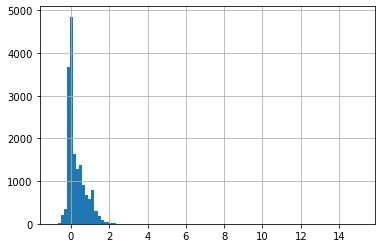

In [91]:
df0[m_16991]['Изменение_цены_расч'].hist(bins=100)

<AxesSubplot:>

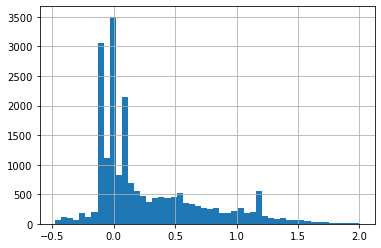

In [92]:
df0.loc[(df0['Изменение_цены_расч']<2)\
        &(df0['Изменение_цены_расч']>-0.5)\
        ,'Изменение_цены_расч'].hist(bins=50)

<AxesSubplot:>

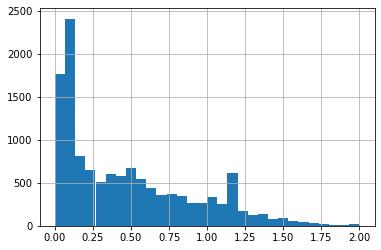

In [93]:
df0.loc[(df0['Изменение_цены_расч']<2)\
        &(df0['Изменение_цены_расч']>-0)\
        ,'Изменение_цены_расч'].hist(bins=30)#dfx['Текущая розничная стоимость'])

<AxesSubplot:>

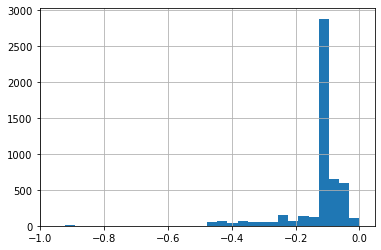

In [96]:
df0.loc[(df0['Изменение_цены_расч']<0)\
        &(df0['Изменение_цены_расч']>-1)\
        ,'Изменение_цены_расч'].hist(bins=30)#dfx['Текущая розничная стоимость'])

In [97]:
df0.loc[(df0['Изменение_цены_расч']<0)\
        &(df0['Изменение_цены_расч']>-1)\
        ,'Изменение_цены_расч'].hist?

In [71]:
del dfx

In [98]:
df0['Изменение_цены_расч'].describe()

C:\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


count    3.426900e+04
mean              inf
std               NaN
min     -9.542437e-01
25%      1.850197e-02
50%      7.664044e-01
75%               NaN
max               inf
Name: Изменение_цены_расч, dtype: float64

In [104]:
df0[m_16991][['Изменение_цены_расч', 'Изменение цены' ]]\
    .assign(delta=lambda x: x['Изменение_цены_расч']-x['Изменение цены' ])

Изменение_цены_расч Изменение цены delta
0                -0.120000          -0.12   0.0
1                -0.243445      -0.243445   0.0
2                 0.769223       0.769223   0.0
3                 0.836900         0.8369   0.0
4                 0.083343       0.083343   0.0
...                    ...            ...   ...
17758             1.160494       1.160494   0.0
17759             0.125232       0.125232   0.0
17760             0.457803       0.457803   0.0
17761             0.040580        0.04058   0.0
17762             0.847159       0.847159   0.0

[16991 rows x 3 columns]

In [99]:
df0.columns

Index(['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самор

## Вариант 2

In [105]:
cut_bins2 = [df0['Изменение_цены_расч'].min(),-0.50,-0.40,-0.30,-0.20,-0.15,0, 0.15, 0.30, 0.50, 1.0 ,1.5
            ,2 ,3 ,4, df0['Изменение_цены_расч'].max() ]
#cut_labels = ['-0.49 -0.20','-0.19 -0.15','-0.14 0', '0 0.15', '0.15 0.30', '0.29 0.50']
df0['cut_change_price2'] = pd.cut(df0['Изменение_цены_расч'],
                       bins=cut_bins2)


In [106]:
df0[['Изменение_цены_расч','cut_change_price2']]

Изменение_цены_расч cut_change_price2
0                -0.120000      (-0.15, 0.0]
1                -0.243445      (-0.3, -0.2]
2                 0.769223        (0.5, 1.0]
3                 0.836900        (0.5, 1.0]
4                 0.083343       (0.0, 0.15]
...                    ...               ...
34264                  inf        (4.0, inf]
34265                  inf        (4.0, inf]
34266                  inf        (4.0, inf]
34267                  inf        (4.0, inf]
34268                  inf        (4.0, inf]

[34269 rows x 2 columns]

In [109]:
df0[m_16991]['cut_change_price2'].value_counts()

(-0.15, 0.0]      5125
(0.0, 0.15]       3592
(0.5, 1.0]        2659
(0.3, 0.5]        1658
(1.0, 1.5]        1548
(0.15, 0.3]       1440
(-0.3, -0.2]       234
(1.5, 2.0]         210
(-0.2, -0.15]      171
(-0.4, -0.3]       159
(-0.5, -0.4]       144
(2.0, 3.0]          36
(-0.954, -0.5]      13
(3.0, 4.0]           1
(4.0, inf]           1
Name: cut_change_price2, dtype: int64

In [117]:
df0['интервал изменения цены2'] = df0['cut_change_price2']\
    .apply(lambda x:f"{int(x.left*100)}% ~ {'inf' if x.right>100 else int(x.right*100)}%")

In [128]:
#dfx['инт для сортировки2'] = dfx['cut_change_price2'].apply(lambda x:x.left)

In [120]:
df0[['cut_change_price2', 'интервал изменения цены2']]

cut_change_price2 интервал изменения цены2
0          (-0.15, 0.0]                -15% ~ 0%
1          (-0.3, -0.2]              -30% ~ -20%
2            (0.5, 1.0]               50% ~ 100%
3            (0.5, 1.0]               50% ~ 100%
4           (0.0, 0.15]                 0% ~ 15%
...                 ...                      ...
34264        (4.0, inf]              400% ~ inf%
34265        (4.0, inf]              400% ~ inf%
34266        (4.0, inf]              400% ~ inf%
34267        (4.0, inf]              400% ~ inf%
34268        (4.0, inf]              400% ~ inf%

[34269 rows x 2 columns]

## Вариант 1

In [123]:
cut_bins = [df0['Изменение_цены_расч'].min(),-0.50,-0.20,-0.15,0, 0.15, 0.30, 0.50, 1.0 ,1.5
            ,2 ,3 ,4, df0['Изменение_цены_расч'].max() ]
#cut_labels = ['-0.49 -0.20','-0.19 -0.15','-0.14 0', '0 0.15', '0.15 0.30', '0.29 0.50']
df0['cut_change_price'] = pd.cut(df0['Изменение_цены_расч'],
                       bins=cut_bins)


In [124]:
df0[['Изменение_цены_расч','cut_change_price']]

Изменение_цены_расч cut_change_price
0                -0.120000     (-0.15, 0.0]
1                -0.243445     (-0.5, -0.2]
2                 0.769223       (0.5, 1.0]
3                 0.836900       (0.5, 1.0]
4                 0.083343      (0.0, 0.15]
...                    ...              ...
34264                  inf       (4.0, inf]
34265                  inf       (4.0, inf]
34266                  inf       (4.0, inf]
34267                  inf       (4.0, inf]
34268                  inf       (4.0, inf]

[34269 rows x 2 columns]

In [125]:
df0[m_16991]['cut_change_price'].value_counts()

(-0.15, 0.0]      5125
(0.0, 0.15]       3592
(0.5, 1.0]        2659
(0.3, 0.5]        1658
(1.0, 1.5]        1548
(0.15, 0.3]       1440
(-0.5, -0.2]       537
(1.5, 2.0]         210
(-0.2, -0.15]      171
(2.0, 3.0]          36
(-0.954, -0.5]      13
(3.0, 4.0]           1
(4.0, inf]           1
Name: cut_change_price, dtype: int64

In [127]:
df0['интервал изменения цены'] = df0['cut_change_price']\
    .apply(lambda x:f"{int(x.left*100)}% ~ {'inf' if x.right>100 else int(x.right*100)}%")

In [129]:
df0[['cut_change_price', 'интервал изменения цены']]

cut_change_price интервал изменения цены
0         (-0.15, 0.0]               -15% ~ 0%
1         (-0.5, -0.2]             -50% ~ -20%
2           (0.5, 1.0]              50% ~ 100%
3           (0.5, 1.0]              50% ~ 100%
4          (0.0, 0.15]                0% ~ 15%
...                ...                     ...
34264       (4.0, inf]             400% ~ inf%
34265       (4.0, inf]             400% ~ inf%
34266       (4.0, inf]             400% ~ inf%
34267       (4.0, inf]             400% ~ inf%
34268       (4.0, inf]             400% ~ inf%

[34269 rows x 2 columns]

In [131]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [132]:
df0.groupby(by ='cut_change_price') [['Кол', 'Вес','Учётная стоимость','Текущая розничная стоимость',
        'Предлагаемая ГМ розничная стоимость']].sum()

Кол       Вес  Учётная стоимость  \
cut_change_price                                          
(-0.954, -0.5]       27.00    218.58      11,526,220.30   
(-0.5, -0.2]        587.00  3,067.67      30,455,817.21   
(-0.2, -0.15]       176.00  1,113.90       6,149,966.19   
(-0.15, 0.0]      6,796.00 22,988.52     241,367,981.34   
(0.0, 0.15]       4,413.00 14,496.15     196,802,871.20   
(0.15, 0.3]       1,501.00  4,619.73      56,794,013.57   
(0.3, 0.5]        1,737.00  5,413.47      52,332,946.93   
(0.5, 1.0]        2,951.00 10,137.10      69,500,802.04   
(1.0, 1.5]        1,773.00  6,888.95      32,507,105.15   
(1.5, 2.0]          242.00    900.76       7,728,310.37   
(2.0, 3.0]           89.00    320.68       2,694,960.58   
(3.0, 4.0]           71.00    238.64       1,071,773.10   
(4.0, inf]       13,905.00 52,258.30     171,568,886.19   

                  Текущая розничная стоимость  \
cut_change_price                                
(-0.954, -0.5]                 333,062,560.00   
(-0.5, -0.2]                   240,629,041.00   
(-0.2, -0.15]                   39,609,105.00   
(-0.15, 0.0]                   984,572,286.41   
(0.0, 0.15]                    582,588,786.00   
(0.15, 0.3]                    182,471,004.81   
(0.3, 0.5]                     169,357,098.03   
(0.5, 1.0]                     205,807,660.82   
(1.0, 1.5]                     110,670,164.48   
(1.5, 2.0]                      24,636,463.13   
(2.0, 3.0]                       7,557,284.21   
(3.0, 4.0]                       1,818,027.00   
(4.0, inf]                       1,188,381.00   

                  Предлагаемая ГМ розничная стоимость  
cut_change_price                                       
(-0.954, -0.5]                          42,966,741.00  
(-0.5, -0.2]                           165,980,527.00  
(-0.2, -0.15]                           33,056,875.00  
(-0.15, 0.0]                           919,244,417.00  
(0.0, 0.15]                            622,622,574.00  
(0.15, 0.3]                            221,906,542.00  
(0.3, 0.5]                             236,628,764.00  
(0.5, 1.0]                             353,636,060.00  
(1.0, 1.5]                             243,170,197.00  
(1.5, 2.0]                              66,763,583.00  
(2.0, 3.0]                              24,802,585.00  
(3.0, 4.0]                               8,300,907.00  
(4.0, inf]                           1,021,957,860.00

In [97]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [103]:
['Склад','Код в 1С УТ','Изменение_цены_расч',
       'cut_change_price', 'интервал изменения цены', 'инт для сортировки',
       'cut_change_price2', 'интервал изменения цены2', 'инт для сортировки2']

33395

# Сохранения интервалов

In [135]:
import datetime
datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')

'06-11-2023_06-19'

In [139]:
df0[['Код в 1С УТ','фильтр1','фильтр2',
     'Изменение_цены_расч',
       'cut_change_price', 'интервал изменения цены', 
       'cut_change_price2','интервал изменения цены2' ]]\
 .to_excel(folder_res+f"для шаблона фильтр1-2 интервал1-2_{datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')}.xlsx")

In [134]:
df0.columns

Index(['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самор

In [ ]:
dfx.groupby(by ='cut_change_price') [['Кол', 'Вес','Учётная стоимость','Текущая розничная стоимость',
        'Предлагаемая ГМ розничная стоимость']].sum()

In [272]:
dfx[(dfx['Изменение_цены_расч']>3)&(dfx['Склад']=='Интернет-магазин' )]#.to_excel(folder_res+'инет маг повышение цен посмотреть.xlsx')

Склад  УИН             Штрихкод  Код в 1С УТ Наименование  \
2105  Интернет-магазин  NaN 2,000,000,120,713.00  ЦБ-00013924       Кольцо   
2702  Интернет-магазин  NaN 2,000,000,126,418.00  ЦБ-00014517       Серьги   

       Артикул Зав. номер  Проба Номенклатурная группа  \
2105  1К011204    1190112 585.00          П ДМ Юи с ДК   
2702   2С01428   10611.21 585.00          Т ДМ Юи с ДК   

                                                Вставки  ...  \
2105  2Кр57-0,089-3/4А 2Кр57-0,090-3/4А 1Кр57-0,040-...  ...   
2702                 2Кр57-0,237-2/5А 12Кр57-0,392-2/2А  ...   

     Стоимость ДМ по коэфф-му методу Стоимость изделия по коэфф-му методу  \
2105                       18,514.08                           273,406.00   
2702                       39,744.90                           147,355.00   

     Итого расчётная стоимость Подходит ли текущая розничная стоимость  \
2105                273,406.00                                     Нет   
2702                147,355.00                                     Нет   

      Изменение факт цены  dogovora_not_change   mizo  sklad  \
2105           154,665.00                False  False  False   
2702            72,772.00                False  False  False   

     Изменение_цены_расч  cut_change_price  
2105                6.45     (4.0, 24.711]  
2702                3.85        (3.0, 4.0]  

[2 rows x 47 columns]

In [266]:
dfx[(dfx['Изменение_цены_расч']>3)].to_excel(folder_res+'повышение цен больше3 посмотреть.xlsx')

In [295]:
dfx.to_excel(folder_res+'расчет для магазинов без крупных и мизо_'+datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')+'.xlsx')

In [72]:
dfx['Механизм ценообразования'].value_counts()

Коэффициентный метод      21718
Порог по наценке           6513
Порог по цене за грамм     5164
Name: Механизм ценообразования, dtype: int64

# DEL

## Проставим интервалы для изменения цены

In [73]:
df0.columns

Index(['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самор

In [74]:
dfx = df0.copy(deep=True)

In [75]:
dfx ['Изменение_цены_расч'] = (dfx['Предлагаемая ГМ розничная стоимость']-dfx['Текущая розничная стоимость'])/dfx['Текущая розничная стоимость']

In [77]:
cut_bins = [dfx['Изменение_цены_расч'].min(),-0.50,-0.20,-0.15,0, 0.15, 0.30, 0.50, 1.0, 1.5
            ,2 ,3 ,4, dfx['Изменение_цены_расч'].max() ]
#cut_labels = ['-0.49 -0.20','-0.19 -0.15','-0.14 0', '0 0.15', '0.15 0.30', '0.29 0.50']
dfx['cut_change_price'] = pd.cut(dfx['Изменение_цены_расч'],
                       bins=cut_bins)


In [78]:
dfx[['Изменение_цены_расч','cut_change_price']]

Изменение_цены_расч cut_change_price
0                -0.120000     (-0.15, 0.0]
1                -0.243445     (-0.5, -0.2]
2                 0.769223       (0.5, 1.0]
3                 0.836900       (0.5, 1.0]
4                 0.083343      (0.0, 0.15]
...                    ...              ...
33390                  NaN              NaN
33391                  NaN              NaN
33392                  NaN              NaN
33393                  NaN              NaN
33394                  NaN              NaN

[33395 rows x 2 columns]

In [79]:
dfx['cut_change_price'].value_counts()

(-0.15, 0.0]      5957
(0.0, 0.15]       4401
(0.5, 1.0]        2948
(1.0, 1.5]        1781
(0.3, 0.5]        1734
(0.15, 0.3]       1504
(-0.5, -0.2]       569
(1.5, 2.0]         243
(-0.2, -0.15]      175
(4.0, 15.054]      120
(2.0, 3.0]          91
(3.0, 4.0]          73
(-0.833, -0.5]      11
Name: cut_change_price, dtype: int64

In [80]:
dfx['интервал изменения цены'] = dfx['cut_change_price'].apply(lambda x:f'{int(x.left*100)}% ~ {int(x.right*100)}%')

In [81]:
dfx['инт для сортировки'] = dfx['cut_change_price'].apply(lambda x:x.left)

In [82]:
dfx[['cut_change_price', 'интервал изменения цены', 'инт для сортировки']]

cut_change_price интервал изменения цены инт для сортировки
0         (-0.15, 0.0]               -15% ~ 0%              -0.15
1         (-0.5, -0.2]             -50% ~ -20%              -0.50
2           (0.5, 1.0]              50% ~ 100%               0.50
3           (0.5, 1.0]              50% ~ 100%               0.50
4          (0.0, 0.15]                0% ~ 15%               0.00
...                ...                     ...                ...
33390              NaN                     NaN                NaN
33391              NaN                     NaN                NaN
33392              NaN                     NaN                NaN
33393              NaN                     NaN                NaN
33394              NaN                     NaN                NaN

[33395 rows x 3 columns]

In [84]:
dfx[['интервал изменения цены']].hist()

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [376]:
dfx.to_excel(folder_res+'проставить интервалы и флаги_'+datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')+'.xlsx')

### Готовим поле со слиянием

In [44]:
df0[['Поставщик', 'Договор', 'Партия']]\
.info()
#.apply( lambda x :x[0]+';'+x[1]+';'+x[2]
#    , axis=1).unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33395 entries, 0 to 33394
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Поставщик  33395 non-null  object
 1   Договор    33395 non-null  object
 2   Партия     29532 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [45]:
def to_str(x):
    return x if type(x) == type('') else '' 

In [46]:
to_str(0)

''

In [47]:
df0[['Поставщик', 'Договор', 'Партия']]\
 .apply( lambda x :to_str(x[0])+';'+to_str(x[1])+';'+to_str(x[2]), axis=1)\
 .unique()

array(['Саха Минералс Лимитед;Sakha Minerals Limited SM21-01 от 28.09.2021;спецификация №1 от 27.01.2022г.',
       'Из Москвы;Товар ДК;',
       'ИП "Алексеев В.М.";10-271 от 21.12.2018;Броши',
       'Драгоценности Якутии ООО;№ 06-329/2 от 12.12.16;06-329/2 от 12.12.2016 Задание №4',
       'Драгоценности Якутии ООО;06-341/4 от 26.12.2016;51 ДК',
       'Сахаювелир ООО;03/10-95 от 15.05.08;64/08 от 15.05.08 дк',
       'Сахаювелир ООО;89/1/06 от 20.04.06;Тн №1067/06 от 31.10.06 (ДК и ПДК)585+750',
       'Драгоценности Якутии ООО;№03/10-212 от 05.11.07;ДЯ 03/10-212 от 05.11.07 (18 партия)',
       'Драгоценности Якутии ООО;№6/2-08-КП от 14.01.2008г.;3 партия',
       'Драгоценности Якутии ООО;06-329/2 от 12.12.16 задание 6;Кольца ДК',
       'Саха Минералс Лимитед;SM10-04 от 11.10.2011 доп2;спецификация №2',
       'Невский Бриллиант;№10-159 от 30.06.14;№2',
       'ИП "Алексеев В.М.";10-271 от 21.12.2018;Кольца',
       'Драгоценности Якутии ООО;06-13 от 24.01.2011г.;Рнк №25 от 24.0

In [48]:
len(_)

511

In [49]:
df0['ПоставщикДоговорПартия'] = df0[['Поставщик', 'Договор', 'Партия']]\
.apply( lambda x :to_str(x[0])+';'+to_str(x[1])+';'+to_str(x[2]), axis=1)

## Выясняем дату поставки

In [50]:
df0['ПоставщикДоговорПартия']

0        Саха Минералс Лимитед;Sakha Minerals Limited S...
1                                      Из Москвы;Товар ДК;
2            ИП "Алексеев В.М.";10-271 от 21.12.2018;Броши
3        Драгоценности Якутии ООО;№ 06-329/2 от 12.12.1...
4        Драгоценности Якутии ООО;06-341/4 от 26.12.201...
                               ...                        
33390    Золото Якутии ОАО АПЮК;Из магазина;Акт №1 АК "...
33391    Золото Якутии ОАО АПЮК;Из магазина;Акт №1 АК "...
33392    Золото Якутии ОАО АПЮК;Из магазина;Акт №1 АК "...
33393    Золото Якутии ОАО АПЮК;Из магазина;Акт №1 АК "...
33394    Золото Якутии ОАО АПЮК;Из магазина;Акт №1 АК "...
Name: ПоставщикДоговорПартия, Length: 33395, dtype: object

In [51]:
#Определяем только с разделителем .
df0['list_d_date'] = df0['ПоставщикДоговорПартия'].apply(lambda x: re.findall(r'\d{1,4}\s*[.]+\s*\d\d\s*[.]+\s*\d{1,4}', x))


In [52]:
df0['list_d_date'].map(len).value_counts() 

1    17055
2    14415
0     1016
3      909
Name: list_d_date, dtype: int64

In [53]:
#лишняя
df0['list_d_date'] = df0['list_d_date'].apply(lambda lx:[x.replace('-','.') for x in lx]) 

In [54]:
df0['list_d_date']

0        [28.09.2021, 27.01.2022]
1                              []
2                    [21.12.2018]
3          [12.12.16, 12.12.2016]
4                    [26.12.2016]
                   ...           
33390                          []
33391                          []
33392                          []
33393                          []
33394                          []
Name: list_d_date, Length: 33395, dtype: object

In [55]:
#поиск остановки
for lx in df0['list_d_date']:
    print('lx=',lx)
    print( [correct_jyear(x) for x in lx ])

lx= ['28.09.2021', '27.01.2022']


NameError: name 'correct_jyear' is not defined

In [464]:
df0.loc[df0['list_d_date'].apply(lambda x: x == ['03.10.172', '20.09.2002']), ['ПоставщикДоговорПартия']]

Empty DataFrame
Columns: [ПоставщикДоговорПартия]
Index: []

In [481]:
#Определяем только с разделителем .
df0['list_d_date_-'] = df0['ПоставщикДоговорПартия'].apply(lambda x: re.findall(r'\d{1,4}\s*[-]+\s*\d\d\s*[-]+\s*\d{1,4}', x))


In [56]:
df0['list_d_date_-'].map(len).value_counts() 

KeyError: 'list_d_date_-'

In [57]:
df0.loc[df0['list_d_date_-'].map(len)!=0, 'ПоставщикДоговорПартия'].unique()

KeyError: 'list_d_date_-'

In [ ]:
#Нет даты через -

In [487]:
df0.drop(columns=['list_d_date_-'], inplace=True)

# Сохранение пром рез

In [490]:
folder_res

'../res/'

In [491]:
os.listdir(folder_res)

['h.txt']

In [498]:
df0.to_excel(folder_res+f'df0 с датой'+datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')+'.xlsx')

In [496]:
datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')


'06-10-2023_18-50'

In [465]:
for lx in df0['list_d_date']:
    print('lx=',lx)
    print(max([datetime.datetime.strptime(correct_jyear(x),
                                f'%d.%m.%Y').date() for x in lx ]) if len( [datetime.datetime.strptime(correct_jyear(x),
                                f'%d.%m.%Y').date() for x in lx ])!=0 else '')

lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= []

lx= ['21.12.2018']
2018-12-21
lx= ['12.12.16', '12.12.2016']
2016-12-12
lx= ['26.12.2016']
2016-12-26
lx= ['15.05.08', '15.05.08']
2008-05-15
lx= ['20.04.06', '31.10.06']
2006-10-31
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['14.01.2008']
2008-01-14
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['12.12.16']
2016-12-12
lx= ['12.12.16']
2016-12-12
lx= ['12.12.16']
2016-12-12
lx= ['11.10.2011']
2011-10-11
lx= 

lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']

lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']

lx= ['12.12.16']
2016-12-12
lx= ['12.12.16', '12.12.2016']
2016-12-12
lx= ['12.12.16']
2016-12-12
lx= ['24.05.2019']
2019-05-24
lx= ['21.12.2018']
2018-12-21
lx= ['24.05.2019']
2019-05-24
lx= ['24.05.2019']
2019-05-24
lx= ['10.07.2019']
2019-07-10
lx= ['12.12.16', '12.12.16']
2016-12-12
lx= ['10.07.2019']
2019-07-10
lx= ['10.07.2019']
2019-07-10
lx= ['30.03.2012', '13.09.13']
2013-09-13
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['12.12.16', '12.12.2016']
2016-12-12
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['12.12.16', '12.12.2016']
2016-12-12
lx= ['10.07.2019']
2019-07-10
lx= ['12.12.16', '12.12.16']
2016-12-12
lx= ['10.07.2019']
2019-07-10
lx= ['21.12.2018']
2018-12-21
lx= ['10.07.2019']
2019-07-10
lx= ['12.12.16', '12.12.2016']
2016-12-12
lx= ['10.07.2019']
2019-07-10
lx= ['21.12.2018']
2018-12-21
lx= ['10.07.2019']
2019-07-10
lx= ['21.12.2018']
2018-12-21
lx= ['10.0

2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '2

lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['05.04.2022']
2022-04-05
lx= ['30.12.2011']
2011-12-30
lx= ['07.07.2016', '30.07.16']
2016-07-30
lx= []

lx= ['30.12.2011']
2011-12-30
lx= ['30.11.2011']
2011-11-30
lx= ['21.12.2018']
2018-12-21
lx= ['30.03.2012', '14.03.14', '30.03.2012', '14.03.14']
2014-03-14
lx= ['30.03.2012', '14.03.14', '30.03.2012', '14.03.14']
2014-03-14
lx= ['30.03.2012', '14.03.14', '30.03.2012', '14.03.14']
2014-03-14
lx= ['30.03.2012', '14.03.14', '30.03.2012', '14.03.14']

2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['30.03.12']
2012-03-30
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= []

lx= ['16.01.2008']
2008-01-16
lx= ['16.01.2008']
2008-01-16
lx= []

lx= ['12.12.16', '12.12.2016']
2016-12-12
lx= ['07.07.2016', '30.07.16']
2016-07-30
lx= ['30.03.12', '30.03.12']
2012-03-30
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['29.12.2008', '29.12.2008']
2008-12-29
lx= ['29.10.08', 

lx= ['24.05.2019']
2019-05-24
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['30.03.12', '01.10.14', '29.12.14']
2014-12-29
lx= ['24.05.2019']
2019-05-24
lx= ['12.12.16']
2016-12-12
lx= ['21.12.2018']
2018-12-21
lx= ['30.03.2012', '14.03.14', '30.03.2012', '14.03.14']
2014-03-14
lx= ['20.12.2019', '06.04.2020']
2020-04-06
lx= ['26.09.07', '26.09.07']
2007-09-26
lx= ['20.12.2019', '06.04.2020']
2020-04-06
lx= ['22.11.2011']
2011-11-22
lx= ['30.03.12']
2012-03-30
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11
lx= ['07.10.10', '07.10.10']
2010-10-07
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['11.10.2011']
2011-10-11


2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.16', '18.10.16', '31.05.17']
2017-05-31
lx= ['20.12.2019', '06.04.2020']
2020-04-06
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['14.07.2011', '14.07.2011']
2011-07-14
lx= ['11.10.2011']
2011-10-11
lx= ['04.05.16', '18.10.16', '31.05.17']
2017-05-31
lx= ['30.03.12']
2012-03-30
lx= ['11.10.2011']
2011-10-11
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['07.10.10', '07.10.10']
2010-10-07
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['07.10.10', '07.10.10']
2010-10-07
lx= ['14.07.2011', '14.07.2011']
2011-07-14
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['14.07.2011', '14.07.2011']
2011-07-14
lx= ['30.03.12']
2012-03-30
lx= ['11.10.2011']
2011-10-11
lx= ['11.10.201

lx= ['30.03.2012', '30.03.2012']
2012-03-30
lx= ['23.08.12', '23.08.12']
2012-08-23
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['27.03.2009', '25.03.09']
2009-03-27
lx= ['19.03.2004', '16.04.2004']
2004-04-16
lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= ['10.12.2019', '10.12.2019']
2019-12-10
lx= ['10.12.2019', '10.12.2019']
2019-12-10
lx= ['10.12.2019', '10.12.2019']
2019-12-10
lx= ['10.12.2019', '10.12.2019']
2019-12-10
lx= ['10.12.2019', '10.12.2019']
2019-12-10
lx= ['10.12.2019', '10.12.20

2018-11-28
lx= ['28.11.18']
2018-11-28
lx= ['28.11.18']
2018-11-28
lx= ['28.11.18']
2018-11-28
lx= ['28.11.18']
2018-11-28
lx= ['01.03.2019', '01.03.19']
2019-03-01
lx= ['01.03.2019', '01.03.19']
2019-03-01
lx= []

lx= []

lx= []

lx= ['29.08.2016', '22.09.2016']
2016-09-22
lx= ['28.12.19']
2019-12-28
lx= ['28.12.19']
2019-12-28
lx= []

lx= []

lx= ['10.06.16', '10.06.16']
2016-06-10
lx= ['28.02.02']
2002-02-28
lx= ['28.02.02']
2002-02-28
lx= ['30.01.04']
2004-01-30
lx= ['30.01.04']
2004-01-30
lx= ['30.01.04']
2004-01-30
lx= ['30.01.04']
2004-01-30
lx= ['30.01.04']
2004-01-30
lx= ['02.10.98', '02.10.98']
1998-10-02
lx= ['02.10.98', '02.10.98']
1998-10-02
lx= ['21.04.09', '21.04.09']
2009-04-21
lx= ['30.03.2012', '30.03.2012']
2012-03-30
lx= ['30.03.2012', '30.03.2012']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['04.09.2019', '06.08.19']
2019-09-04
lx= ['04.09.2019', '06.08.19']
2019-09-04
lx= ['04.09.2019', '06.08.19']
2019-09-04

lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']

lx= ['30.06.14']
2014-06-30
lx= ['21.10.05']
2005-10-21
lx= ['28.02.02']
2002-02-28
lx= ['29.03.12']
2012-03-29
lx= ['07.07.2016', '30.07.16']
2016-07-30
lx= ['06.10.17', '06.10.17']
2017-10-06
lx= ['12.12.16']
2016-12-12
lx= ['21.12.2018']
2018-12-21
lx= ['12.12.16']
2016-12-12
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['12.12.16']
2016-12-12
lx= ['12.12.16']
2016-12-12
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['12.12.16']
2016-12-12
lx= ['12.12.16']
2016-12-12
lx= ['12.12.16']
2016-12-12
lx= ['12.12.16']
2016-12-12
lx= ['31.05.05']
2005-05-31
lx= ['07.10.10', '07.10.10']
2010-10-07
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['14.12.2009', '14.12.2009']
2009-12-14
lx= ['27.03.2009', '27.03.09']
2009-03-27
lx= ['28.02.02']
2002-02-28
lx= ['30.01.04']
2004-01-30
lx= ['28.02.02']
2002-02-28
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['30.06.14']
2014-06-30
lx= ['21.10.05']
2005-10-21
lx= ['30.03.2010', '30.03.10']
2010-03

lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['22.12.2021', '25.04.2022']
2022-04-25
lx= ['29.06.2022']
2022-06-29
lx

lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['01.09.06', '30.08.06']
2006-09-01
lx= ['01.09.06', '30.08.06']
2006-09-01
lx= ['01.09.06', '30.08.06']
2006-09-01
lx= ['21.01.2008']
2008-01-21
lx= ['11.12.09', '14.12.09']
2009-12-14
lx= ['30.06.2016']
2016-06-30
lx= ['23.08.12', '23.08.12']
2012-08-23
lx= ['29.03.2012']
2012-03-29
lx= ['02.08.06', '02.08.06']
2006-08-02
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['23.08.12', '23.08.12']
2012-08-23
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.12', '29.03.13']
2013-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['

lx= ['12.12.16']
2016-12-12
lx= ['20.12.2019', '06.04.2020']
2020-04-06
lx= ['20.12.2019', '06.04.2020']
2020-04-06
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['30.03.12']
2012-03-30
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['11.10.2011', '11.10.2011']
2011-10-11
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['14.07.2011', '14.07.2011']
2011-07-14
lx= ['30.03.12']
2012-03-30
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['14.07.2011', '14.07.2011']
2011-07-14
lx= ['30.03.12']
2012-03-30
lx= ['30.03.12']
2012-03-30
lx= ['11.10.2011']
2011-10-11
lx= ['30.03.12']
2012-03-30
lx= ['

2020-04-06
lx= ['10.07.2019']
2019-07-10
lx= ['10.07.2019']
2019-07-10
lx= ['20.12.2019', '06.04.2020']
2020-04-06
lx= ['10.07.2019']
2019-07-10
lx= ['14.12.2009', '14.12.09']
2009-12-14
lx= ['29.12.2008', '29.12.2008']
2008-12-29
lx= ['10.07.2019']
2019-07-10
lx= ['14.12.2009', '14.12.09']
2009-12-14
lx= ['12.05.2009', '04.05.09']
2009-05-12
lx= ['22.11.2011']
2011-11-22
lx= ['07.07.2016', '30.07.16']
2016-07-30
lx= ['30.03.12', '01.10.14', '29.12.14']
2014-12-29
lx= ['28.02.02']
2002-02-28
lx= ['12.12.16', '12.12.16']
2016-12-12
lx= ['31.10.06', '02.10.06']
2006-10-31
lx= ['30.03.12', '01.10.14', '29.12.14']
2014-12-29
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['22.11.2011']
2011-11-22
lx= ['30.03.12', '01.10.14', '29.12.14']
2014-12-29
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['12.12.16']
2016-12-12
lx= ['12.12.16']
2016-12-12
lx= ['10.12.2019', '10.12.2019']
2019-12-10
lx= ['30.03.12', '04.03.13', '30.03.12', '04.03.13']
2013-03-04
lx= ['19.06.2012', '19.06.2012']
2012-06-19
l

lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['14.05.2020']
2020-05-14
lx= ['10.07.2019']
2019-07-10
lx= ['11.03.2011', '22.03.2011']
2011-03-22
lx= ['30.03.12', '30.03.12']
2012-03-30
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['26.03.2020', '26.03.2020']
2020-03-26
lx= ['30.06.2016']
2016-06-30
lx= ['30.06.2016']
2016-06-30
lx= ['30.06.2016']
2016-06

lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.01.2008']
2008-01-21
lx= ['29.03.12', '26.12.12']
2012-12-26
lx= ['29.03.12', '23.04.13']
2013-04-23
lx= ['28.02.02']
2002-02-28
lx= ['01.04.2011', '04.04.2011']
2011-04-04
lx= ['29.03.12', '23.04.13']
2013-04-23
lx= ['28.02.02']
2002-02-28
lx= ['25.06.2019', '25.06.2019']
2019-06-25
lx= ['25.06.2019', '25.06.2019']
2019-06-25
lx= ['10.07.2019']
2019-07-10
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['29.03.12', '26.12.12']
2012-12-26
lx= ['30.03.12', '06.08.15', '03.12.2015']
2015-12-03
lx= ['20.12.2019', '06.04.2020']
2020-04-06
lx= ['11.12.09', '14.12.09']
2009-12-14
lx= ['29.03.12', '23.04.13']
2013-04-23
lx= ['30.03.2012', '14.03.14', '30.03.2012', '14.03.14']
2014-03-14
lx= ['21.01.2008']
2008-01-21
lx= ['01.04.2011', '04.04.2011']
2011-04-04
lx= ['29.03.12']
2012-03-29
lx= ['12.12.16']
2016-12-12
lx= ['24.05.2019']
2019-05-24
lx= ['24.05.2019']
2019-05-24
lx= ['24.05.2019']
2019-05-24
lx= ['

lx= ['28.09.2021', '27.01.2022']
2022-01-27
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.06.14']
2014-06-30
lx= ['30.03.12', '01.08.13']
2013-08-01
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['11.12.09', '14.12.09']
2009-12-14
lx= ['24.05.2019']
2019-05-24
lx= ['20.12.2019', '06.04.2020']
2020-04-06
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['27.09.2019', '27.09.2019']
2019-09-27
lx= ['30.03.2012', '12.08.14']
2014-08-12
lx= ['07.07.2016', '30.07.16']
2016-07-30
lx= ['12.12.16', '12.12.2016']
2016-12-12
lx= ['12.12.16', '12.12.2016']
2016-12-12
lx= ['04.05.16', '18.10.16', '31.05.17']
2017-05-31
lx= ['04.05.2016', '04.05.2016']
2016-05-0

2018-12-21
lx= ['14.01.2008']
2008-01-14
lx= ['14.01.2008']
2008-01-14
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['31.10.06', '02.10.06']
2006-10-31
lx= ['26.12.2016']
2016-12-26
lx= ['26.12.2016']
2016-12-26
lx= ['26.12.2016']
2016-12-26
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['17.03.2010', '17.03.2010']
2010-03-17
lx= ['17.03.2010', '17.03.2010']
2010-03-17
lx= ['17.03.2010', '17.03.2010']
2010-03-17
lx= ['17.03.2010', '17.03.2010']
2010-03-17
lx= ['24.12.2019']
2019-12-24
lx= ['30.09.2010', '30.09.2010']
2010-09-30
lx= ['30.09.2010', '30.09.2010']
2010-09-30
lx= ['30.09.2010', '30.09.2010']
2010-09-30
lx= ['30.09.2010', '30.09.2010']
2010-09-30
lx= ['30.09.2010', '30.09.2010']
2010-09-30
lx= ['29.10.08', '04.12.2008']
2008-12-04
lx= ['27.10.2021']
2021-10-27
l

2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '24.01.2011']
2011-01-24
lx= ['24.01.2011', '2

2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21
lx= ['21.01.2008']
2008-01-21

2006-10-31
lx= ['31.10.06', '02.10.06']
2006-10-31
lx= ['31.10.06', '02.10.06']
2006-10-31
lx= ['31.10.06', '02.10.06']
2006-10-31
lx= ['31.10.06', '02.10.06']
2006-10-31
lx= ['31.10.06', '02.10.06']
2006-10-31
lx= ['31.10.06', '02.10.06']
2006-10-31
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['23.12.2016']
2016-12-23
lx= ['26.12.2016']
2016-12-26
lx= ['26.12.2016']
2016-12-26
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29

2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '2


lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22

lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05


2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']


lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.0

2011-04-04
lx= ['01.04.2011', '04.04.2011']
2011-04-04
lx= ['15.04.2011', '03.08.2011']
2011-08-03
lx= ['29.04.2010']
2010-04-29
lx= ['29.04.2010']
2010-04-29
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
l

2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']
2006-08-17
lx= ['21.10.05', '17.08.06']


2009-12-21
lx= ['21.12.2009', '21.12.09']
2009-12-21
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['28.03.2019', '28.03.19']
2019-03-28
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['26.10.2020', '26.10.2020']
2020-10-26
lx= ['12.11

2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.2012']
2012-03-29
lx= ['29.03.12', '29.03.13']
2013-03-29
lx= ['29.03.12', '29.03.13']
2013-03-29
lx= ['29.03.12', '29.03.13']
2013-03-29
lx= ['29.03.12', '29.03.13']
2013-03-29
lx= ['29.03.12', '29.03.13']
2013-03-29
lx= ['29.

lx= ['04.05.16', '18.10.16', '31.05.17']
2017-05-31
lx= ['04.05.16', '18.10.16', '31.05.17']
2017-05-31
lx= ['04.05.16', '18.10.16', '31.05.17']
2017-05-31
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['04.05.2016', '04.05.2016']
2016-05-04
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= ['21.12.2018']
2018-12-21
lx= 

2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29
lx= ['29.06.2010']
2010-06-29

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= []

lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22
lx= ['29.03.12', '22.04.13']
2013-04-22


lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05
lx= ['05.11.07', '05.11.07']
2007-11-05


2009-05-12
lx= ['12.05.2009', '04.05.09']
2009-05-12
lx= ['12.05.2009', '04.05.09']
2009-05-12
lx= ['11.12.09', '14.12.09']
2009-12-14
lx= ['11.12.09', '14.12.09']
2009-12-14
lx= ['11.12.09', '14.12.09']
2009-12-14
lx= ['11.12.09', '14.12.09']
2009-12-14
lx= ['11.12.09', '14.12.09']
2009-12-14
lx= ['14.12.2009', '14.12.09']
2009-12-14
lx= ['14.12.2009', '14.12.09']
2009-12-14
lx= ['14.12.2009', '14.12.09']
2009-12-14
lx= ['14.12.2009', '14.12.09']
2009-12-14
lx= ['14.12.2009', '14.12.09']
2009-12-14
lx= ['14.12.2009', '14.12.2009']
2009-12-14
lx= ['14.12.2009', '14.12.2009']
2009-12-14
lx= ['01.04.2011', '04.04.2011']
2011-04-04
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.02']
2002-05-09
lx= ['30.11.2001', '09.05.0

2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '09.12.2021']
2021-12-09
lx= ['27.05.2021', '0

In [ ]:
#dodo

In [470]:
df0['max_d_date'] = df0['list_d_date'].apply(lambda lx:max([datetime.datetime.strptime(correct_jyear(x),
                                f'%d.%m.%Y').date() for x in lx ]) if len( [datetime.datetime.strptime(correct_jyear(x),
                                f'%d.%m.%Y').date() for x in lx ])!=0 else '')

In [472]:
(df0['max_d_date'].isna()).sum()




0

In [479]:
#Договора с неопределенной датой
df0.loc[df0['max_d_date'].map(type)==type('d'), 'ПоставщикДоговорПартия'].unique()

array(['Из Москвы;Товар ДК;Товар ДК',
       'Из Москвы;Продукция ДК;Продукция ДК',
       'Из Москвы;Ноблес ДК;Ноблес ДК',
       'Сахаювелир ООО;Из магазина;Акт №1 ООО "Сахаювелир"',
       'Возврат ООО "Невский бриллиант";Возврат ООО "Невский бриллиант";Возврат ООО "Невский бриллиант"',
       'Кристалл 2001  ООО;Из магазина;Акт №1 ООО "Кристалл 2001"',
       'ООО "Сахаювелир ДВ";ДК;ДК',
       'Белорус Диаманд АОЗТ;Ювелирные изделия с ДК;Ювелирные изделия с ДК',
       'Из Москвы;Сапфир М ДК;Сапфир М ДК',
       'Возврат ООО "Бриллиантовая Якутия";дк;1',
       'Возврат ООО "Невский бриллиант";Ювелирные изделия;Возврат ООО "Невский бриллиант"',
       'ООО"Даймонд Стар";Ювелирные изделия;ООО"Даймонд Стар"',
       'Золото Якутии ОАО АПЮК;Из магазина;Акт №1 АК "Золото Якутии"',
       'Хомус-2014;№23 ПДК;№23 ПДК', 'Хомус-2014;№27 ДК;№27 ДК',
       'Хомус-2014;№23 ДК;№23 ДК', '0;0;0',
       'Из Москвы;Возврат от Саха-Таас;Возврат от Саха-Таас',
       'Кристалл 2001  ООО;Из магази

In [480]:
len(_)

25

In [476]:
df0['max_d_date']

0        2022-01-27
1                  
2        2018-12-21
3        2016-12-12
4        2016-12-26
            ...    
34523              
34524              
34525              
34526              
34527              
Name: max_d_date, Length: 34528, dtype: object

In [469]:
df0.columns

Index(['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самор

In [458]:
correct_jyear('03.10.199')

NameError: name 'MyError' is not defined

In [382]:
def max_from_list(lx):
    #list-> to date list -> max
    return max([datetime.datetime.strptime(correct_jyear(x,'.'),
              f'%d.%m.%Y').date() for x in lx ]) if len( [datetime.datetime.strptime(correct_jyear(x,'.'),
              f'%d.%m.%Y').date() for x in lx ])!=0 else ''

In [383]:
max_from_list(['20.04.06', '31.10.06'])

datetime.date(2006, 10, 31)

In [388]:
max_from_list([])

''

In [390]:
#df0['max_d_date'].
df0['list_d_date'].map(max_from_list)

TypeError: strptime() argument 1 must be str, not list

In [371]:
text_todate('23.09.2003')

datetime.date(2003, 9, 23)

In [366]:
text_todate('23.09.2003')

NameError: name 'MyError' is not defined

In [361]:
for x in list(df0['ПоставщикДоговорПартия'].unique()):
    print( x,  re.findall(r'\d{1,4}\s*[.-]+\s*\d\d\s*[.-]+\s*\d{1,4}', x))

Саха Минералс Лимитед;Sakha Minerals Limited SM21-01 от 28.09.2021;спецификация №1 от 27.01.2022г. ['28.09.2021', '27.01.2022']
Из Москвы;Товар ДК;Товар ДК []
ИП "Алексеев В.М.";10-271 от 21.12.2018;Броши ['21.12.2018']
Драгоценности Якутии ООО;№ 06-329/2 от 12.12.16;06-329/2 от 12.12.2016 Задание №4 ['12.12.16', '12.12.2016']
Драгоценности Якутии ООО;06-341/4 от 26.12.2016;51 ДК ['26.12.2016']
Сахаювелир ООО;03/10-95 от 15.05.08;64/08 от 15.05.08 дк ['15.05.08', '15.05.08']
Сахаювелир ООО;89/1/06 от 20.04.06;Тн №1067/06 от 31.10.06 (ДК и ПДК)585+750 ['20.04.06', '31.10.06']
Драгоценности Якутии ООО;№03/10-212 от 05.11.07;ДЯ 03/10-212 от 05.11.07 (18 партия) ['05.11.07', '05.11.07']
Драгоценности Якутии ООО;№6/2-08-КП от 14.01.2008г.;3 партия ['14.01.2008']
Драгоценности Якутии ООО;06-329/2 от 12.12.16 задание 6;Кольца ДК ['12.12.16']
Саха Минералс Лимитед;SM10-04 от 11.10.2011 доп2;спецификация №2 ['11.10.2011']
Невский Бриллиант;№10-159 от 30.06.14;№2 ['30.06.14']
ИП "Алексеев В.М.";

In [ ]:
 re.findall(r'\d{1,4}\s*[.-]+\s*\d\d\s*[.-]+\s*\d{1,4}', t)

In [359]:
text_todate('Саха Минералс Лимитед;Sakha Minerals Limited SM21-01 от 28.09.2021;спецификация №1 от 31.12.2023 cvcv 27.01.2022г.')

NameError: name 'MyError' is not defined

In [336]:
t_text = ''' 
Саха Минералс Лимитед;Sakha Minerals Limited SM21-01 от 28.09.2021;спецификация №1 от 31.12.2023 
cvcv 27.01.2022г.',
       'Из Москвы;Товар ДК;Товар ДК',
       'ИП "Алексеев В.М.";10-271 от 21.12.2018;Броши',
       'Драгоценности Якутии ООО;№ 06-329/2 от 12.12.16;06-329/2 от 12.12.2016 Задание №4',
       'Драгоценности Якутии ООО;06-341/4 от 26.12.2016;51 ДК',
       'Сахаювелир ООО;03/10-95 от 15.05.08;64/08 от 15.05.08 дк',
       'Сахаювелир ООО;89/1/06 от 20.04.06;Тн №1067/06 от 31.10.06 (ДК и ПДК)585+750',
       'Драгоценности Якутии ООО;№03/10-212 от 05.11.07;ДЯ 03/10-212 от 05.11.07 (18 партия)',
       'Драгоценности Якутии ООО;№6/2-08-КП от 14.01.2008г.;3 партия',
       'Драгоценности Якутии ООО;06-329/2 от 12.12.16 задание 6;Кольца ДК',
       'Саха Минералс Лимитед;SM10-04 от 11.10.2011 доп2;спецификация №2',
       'Невский Бриллиант;№10-159 от 30.06.14;№2',
       'ИП "Алексеев В.М.";10-271 от 21.12.2018;Кольца',
       'Драгоценности Якутии ООО;06-13 от 24.01.2011г.;Рнк №25 от 24.01.2011г. ДК',
       'Драгоценности Якутии ООО;№ 06-329/2 от 12.12.16;№06-329/2 от 12.12.16г. Задание №5',
       'Саха Минералс Лимитед;SM10-03 от 14.07.2011 доп.1;SM10-03 от 14.07.2011 доп.1',
       'Саха Минералс Лимитед;SM10-04 от 11.10.2011 доп2;спецификация №5',
       'Саха Минералс Лимитед;SM10-04 от 11.10.2011 доп2;спецификация №1',
       'Золото Якутии ОАО АПЮК;№03/10-214 от 01.09.06;Рнк-4-зя0637 от 30.08.06 (ДК)585+750',
       'Золото Якутии ОАО АПЮК;№03/10-151 от 30.06.06 г.;Рнк-4-зя0586 от 28.06.06 (ДК)',
       'Драгоценности Якутии ООО;№10-121 от 29.03.12 Доп.10 от 29.12.23;т.н. №136 ДК',
       'Саха Минералс Лимитед;SM12-01 от 30.03.12 доп2;спецификация №1 ДК',
'''

In [337]:
max_date_in_text(t_text)

NameError: name 'MyError' is not defined

In [321]:
def max_date_in_text(t):
    list_of_dates = re.findall(r'\d{1,4}\s*[.-]+\s*\d\d\s*[.-]+\s*\d{1,4}', t)
    
    
    return max([text_todate(x) for x in list_of_dates])

In [322]:
max_date_in_text(t_text)

datetime.date(2023, 12, 29)

In [307]:
max(_)

datetime.date(2023, 12, 29)

In [130]:
datetime?

In [131]:
#[ datetime.date(x) for x in t_dates]

In [ ]:
text_todate

# Разработка функции text_todate

In [ ]:
date_time_str = '2018-06-29 08:15:27.243860'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
print('Дата:', date_time_obj.date())
print('Время:', date_time_obj.time())
print('Дата и время:', date_time_obj)
'''Каждый токен представляет собой часть даты и времени: день, месяц, год и т. д. Ознакомьтесь с документацией, если хотите узнать о видах форматирования, поддерживаемых Python. Краткая справка:

%Y: Год (4 цифры)
%m: Месяц
%d: День месяца
%H: Часы (24-часовой формат)
%M: Минуты
%S: Секунды
%f: Миллисекунды
'''

In [ ]:
#[ datetime.date(x) for x in t_dates]

In [140]:
datetime.datetime.strptime('30.03.2012', '%d.%m.%Y').date()

datetime.date(2012, 3, 30)

In [446]:
#function for corect year to date
def text_todate(t):
    '''из текста даты любого численного формата 2001.10.01 '20.10.2023' #'2009.10.23'  #'20 . 10. 23'''
    import re, datetime        
    
    def correct_jyear(t):
        t = t.replace('-','.')
        sep='.'
        #коректор года #'20.10.2023' #'2009.10.23'  #'20.10.23 text''''
        t_list = t.split(sep)
        t_list = [x.strip() for x in t_list]
        if len(t_list) == 3 and len(t_list[2])==4: #'20.10.2023'
            return '.'.join([t_list[0],t_list[1], t_list[2]])
        elif  len(t_list) == 3 and len(t_list[0])==4: #'2009.10.23'
            return '.'.join([t_list[2],t_list[1], t_list[0]])

        elif len(t_list) == 3 and len(t_list[2])==2:  #'20.10.23'
            if 90<int(t_list[2])<=99:
                return '.'.join([t_list[0],t_list[1],'19'+t_list[2]])
            else:
                return '.'.join([t_list[0],t_list[1],'20'+t_list[2]])
        else:
            raise MyError("ошибка год свыше 2023 или дата неверная, разделитель не . - ")
            return  "ошибка год свыше 2023 или дата неверная, разделитель не . - "
   
    
        if len(set(re.findall(r'\D', t))) == 1 \
            and set(re.findall(r'\D', t)) == '.':
            return datetime.datetime.strptime(correct_jyear(t),
                                f'%d.%m.%Y').date()
        else:
            raise MyError(" re ")
    return  "re "

In [444]:
#разработка коректор года #'20.10.2023' #'2009.10.23'  #'20.10.23' 
def correct_jyear(t):
    t = t.replace('-','.')
    sep='.'
    t_list = t.split(sep)
    t_list = [x.strip() for x in t_list]
    if len(t_list) == 3 and len(t_list[2])==4: #'20.10.2023'
        return '.'.join([t_list[0],t_list[1], t_list[2]])
    elif  len(t_list) == 3 and len(t_list[0])==4: #'2009.10.23'
        return '.'.join([t_list[2],t_list[1], t_list[0]])
    elif len(t_list) == 3 and len(t_list[2])==2:  #'20.10.23'
        if 90<int(t_list[2])<=99:
            return '.'.join([t_list[0],t_list[1],'19'+t_list[2]])
        else:
            return '.'.join([t_list[0],t_list[1],'20'+t_list[2]])
    else:
        raise MyError(" re ")
    return  f"re"
#datetime.datetime.strptime(t, f'%d{sep}%m{sep}%Y').date()

In [445]:
correct_jyear('20-10-99')

'20.10.1999'

In [437]:
correct_jyear('03.10.99')

NameError: name 'MyError' is not defined

In [405]:
correct_jyear2('20.10-22')

'20.10.2022'

In [398]:
text_todate('20-10-22')

NameError: name 'MyError' is not defined

28.09.2021 2021-09-28
27.01.2022 2022-01-27
21.12.2018 2018-12-21
12.12.16 2016-12-12
12.12.2016 2016-12-12
26.12.2016 2016-12-26
15.05.08 2008-05-15
15.05.08 2008-05-15
20.04.06 2006-04-20
31.10.06 2006-10-31
05.11.07 2007-11-05
05.11.07 2007-11-05
14.01.2008 2008-01-14
12.12.16 2016-12-12
11.10.2011 2011-10-11
30.06.14 2014-06-30
21.12.2018 2018-12-21
24.01.2011 2011-01-24
24.01.2011 2011-01-24
12.12.16 2016-12-12
12.12.16 2016-12-12
14.07.2011 2011-07-14
14.07.2011 2011-07-14
11.10.2011 2011-10-11
11.10.2011 2011-10-11
01.09.06 2006-09-01
30.08.06 2006-08-30
30.06.06 2006-06-30
28.06.06 2006-06-28
29.03.12 2012-03-29
29.12.23 2023-12-29
30.03.12 2012-03-30


In [152]:
len(set(re.findall(r'\D', '11.10.2011')))

1

In [ ]:
def correct_space(t):
    if t.__contains__('_'):
        return '....'
    else:
        return '0000'

In [ ]:
'%d-%m-%Y

## Проставим интервалы для изменения цены

In [58]:
df0.columns

Index(['Склад', 'УИН', 'Штрихкод', 'Код в 1С УТ', 'Наименование', 'Артикул',
       'Зав. номер', 'Проба', 'Номенклатурная группа', 'Вставки', 'Поставщик',
       'Договор', 'Партия', 'Накладная', 'Кол', 'Вес', 'Учётная стоимость',
       'Текущая розничная стоимость',
       'Есть ли препятствия применению коэффициентного метода',
       'Прейскурантная стоимость бриллиантов, $',
       'Прейскурантная стоимость ЦвДК, $', 'Вес самородков суммированный, г',
       'РасчПЭУ', 'Наценка ПЭУ, со скидкой', 'Расчётная скидка',
       'Предлагаемая ГМ розничная стоимость', 'Наценка, со скидкой',
       'Цена за грамм, со скидкой, округлённая', 'Изменение цены',
       'Механизм ценообразования',
       'Можно ли пересматривать цену (нет, если МИЗО)',
       'Пороговая наценка, со скдикой', 'Пороговая цена за грамм, со скидкой',
       'Стоимость исходя из пороговой наценки',
       'Стоимость исходя из пороговой цены за грамм',
       'Стоимость ДК по коэфф-му методу',
       'Стоимость самор

In [59]:
dfx = df0.copy(deep=True)

In [60]:
dfx ['Изменение_цены_расч'] = (dfx['Предлагаемая ГМ розничная стоимость']-dfx['Текущая розничная стоимость'])/dfx['Текущая розничная стоимость']

In [61]:
cut_bins = [dfx['Изменение_цены_расч'].min(),-0.50,-0.20,-0.15,0, 0.15, 0.30, 0.50, 1.0, 1.5
            ,2 ,3 ,4, dfx['Изменение_цены_расч'].max() ]
#cut_labels = ['-0.49 -0.20','-0.19 -0.15','-0.14 0', '0 0.15', '0.15 0.30', '0.29 0.50']
dfx['cut_change_price'] = pd.cut(dfx['Изменение_цены_расч'],
                       bins=cut_bins)


In [62]:
dfx[['Изменение_цены_расч','cut_change_price']]

Изменение_цены_расч cut_change_price
0                -0.120000     (-0.15, 0.0]
1                -0.243445     (-0.5, -0.2]
2                 0.769223       (0.5, 1.0]
3                 0.836900       (0.5, 1.0]
4                 0.083343      (0.0, 0.15]
...                    ...              ...
33390                  NaN              NaN
33391                  NaN              NaN
33392                  NaN              NaN
33393                  NaN              NaN
33394                  NaN              NaN

[33395 rows x 2 columns]

In [63]:
dfx['cut_change_price'].value_counts()

(-0.15, 0.0]      5957
(0.0, 0.15]       4401
(0.5, 1.0]        2948
(1.0, 1.5]        1781
(0.3, 0.5]        1734
(0.15, 0.3]       1504
(-0.5, -0.2]       569
(1.5, 2.0]         243
(-0.2, -0.15]      175
(4.0, 15.054]      120
(2.0, 3.0]          91
(3.0, 4.0]          73
(-0.833, -0.5]      11
Name: cut_change_price, dtype: int64

In [64]:
dfx['интервал изменения цены'] = dfx['cut_change_price'].apply(lambda x:f'{int(x.left*100)}% ~ {int(x.right*100)}%')

In [65]:
dfx['инт для сортировки'] = dfx['cut_change_price'].apply(lambda x:x.left)

In [66]:
dfx[['cut_change_price', 'интервал изменения цены', 'инт для сортировки']]

cut_change_price интервал изменения цены инт для сортировки
0         (-0.15, 0.0]               -15% ~ 0%              -0.15
1         (-0.5, -0.2]             -50% ~ -20%              -0.50
2           (0.5, 1.0]              50% ~ 100%               0.50
3           (0.5, 1.0]              50% ~ 100%               0.50
4          (0.0, 0.15]                0% ~ 15%               0.00
...                ...                     ...                ...
33390              NaN                     NaN                NaN
33391              NaN                     NaN                NaN
33392              NaN                     NaN                NaN
33393              NaN                     NaN                NaN
33394              NaN                     NaN                NaN

[33395 rows x 3 columns]

In [376]:
dfx.to_excel(folder_res+'проставить интервалы и флаги_'+datetime.datetime.now().strftime('%d-%m-%Y_%H-%M')+'.xlsx')

# DELETE

## Добавляем поле для слияния данных 'Поставщик', 'Договор', 'Партия' в одно поле  'ПоставщикДоговорПартия'

### Надо починить годы у  ООО "Джема (год протянут по возрастанию)'

In [17]:
df0.loc[df0[['Поставщик', 'Договор', 'Партия']].apply( lambda x :x[0]+';'+x[1][:-1]+';'+x[2][:-1]
    , axis=1).isin(['ООО "Джема;10-216 от 12.11.202;10-216 от 12.11.202']),
       ['Договор', 'Партия']] = '10-216 от 12.11.2022','10-216 от 12.11.2022'

TypeError: 'float' object is not subscriptable

In [18]:
df0[df0[['Поставщик', 'Договор', 'Партия']].apply( lambda x :x[0]+';'+x[1][:-1]+';'+x[2][:-1]
    , axis=1).isin(['ООО "Джема;10-216 от 12.11.202;10-216 от 12.11.202'])][['Поставщик', 'Договор', 'Партия']]# == 'Саха Минералс Лимитед'

TypeError: 'float' object is not subscriptable

### Готовим поле со слиянием

In [30]:
df0[['Поставщик', 'Договор', 'Партия']]\
.info()
#.apply( lambda x :x[0]+';'+x[1]+';'+x[2]
#    , axis=1).unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33395 entries, 0 to 33394
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Поставщик  33395 non-null  object
 1   Договор    33388 non-null  object
 2   Партия     29532 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB


In [38]:
def to_str(x):
    return x if type(x) == type('') else '' 

In [40]:
to_str(0)

''

array(['Саха Минералс Лимитед;Sakha Minerals Limited SM21-01 от 28.09.2021;спецификация №1 от 27.01.2022г.',
       'Из Москвы;Товар ДК;',
       'ИП "Алексеев В.М.";10-271 от 21.12.2018;Броши',
       'Драгоценности Якутии ООО;№ 06-329/2 от 12.12.16;06-329/2 от 12.12.2016 Задание №4',
       'Драгоценности Якутии ООО;06-341/4 от 26.12.2016;51 ДК',
       'Сахаювелир ООО;03/10-95 от 15.05.08;64/08 от 15.05.08 дк',
       'Сахаювелир ООО;89/1/06 от 20.04.06;Тн №1067/06 от 31.10.06 (ДК и ПДК)585+750',
       'Драгоценности Якутии ООО;№03/10-212 от 05.11.07;ДЯ 03/10-212 от 05.11.07 (18 партия)',
       'Драгоценности Якутии ООО;№6/2-08-КП от 14.01.2008г.;3 партия',
       'Драгоценности Якутии ООО;06-329/2 от 12.12.16 задание 6;Кольца ДК',
       'Саха Минералс Лимитед;SM10-04 от 11.10.2011 доп2;спецификация №2',
       'Невский Бриллиант;№10-159 от 30.06.14;№2',
       'ИП "Алексеев В.М.";10-271 от 21.12.2018;Кольца',
       'Драгоценности Якутии ООО;06-13 от 24.01.2011г.;Рнк №25 от 24.0

In [42]:
len(_)

511

In [43]:
df0['ПоставщикДоговорПартия'] = df0[['Поставщик', 'Договор', 'Партия']]\
.apply( lambda x :to_str(x[0])+';'+to_str(x[1])+';'+to_str(x[2]), axis=1)

## Перечень договоров по которым нельзя менять цены (рублевая учетка не отражает реальную учетку в долларах):

In [20]:
#06-10-2023
#ООО "Джема	10-216 от 12.11.2022	10-216 от 12.11.2022
#ИП «Алексеев В.М.»	10-064 от 07.04.2021	10-064 от 07.04.2021
#ОСОО «Валив»	№V22-01 от 07.07.2022	эксклюзив


In [21]:
df0.loc[df0['Поставщик'].str.strip().str.lower() == 'ООО "Джема'.strip().lower(),['Поставщик', 'Договор', 'Партия'] ]

Empty DataFrame
Columns: [Поставщик, Договор, Партия]
Index: []

In [22]:
df0.loc[df0['Поставщик'].str.strip().str.lower() =='ОСОО "Валив"'.strip().lower(),['Поставщик', 'Договор', 'Партия'] ]

Empty DataFrame
Columns: [Поставщик, Договор, Партия]
Index: []

In [23]:
len(_)

0

In [24]:
df0.loc[df0['Договор'].str.strip().str.lower() =='10-064 от 07.04.2021'.strip().lower(),['Поставщик', 'Договор', 'Партия'] ]

Empty DataFrame
Columns: [Поставщик, Договор, Партия]
Index: []

In [25]:
len(_)

0

### для договоров не подлежащих пересчету флаг df0 - dogovora_not_change

In [26]:
#NB 'ИП «Алексеев В.М.»;10-064 от 07.04.2021;10-064 от 07.04.2021', != 'ИП "Алексеев В.М.";10-064 от 07.04.2021;10-064 от 07.04.2021'

dogovora_not_change = ['ООО "Джема;10-216 от 12.11.2022;10-216 от 12.11.2022',
                       'ОСОО "Валив";№V22-01 от 07.07.2022;эксклюзив',
                       'ИП "Алексеев В.М.";10-064 от 07.04.2021;10-064 от 07.04.2021']


In [27]:
df0['ПоставщикДоговорПартия'].isin(dogovora_not_change).sum()

KeyError: 'ПоставщикДоговорПартия'

In [74]:
df0['dogovora_not_change'] = False
df0.loc[df0['ПоставщикДоговорПартия'].isin(dogovora_not_change), 'dogovora_not_change'] = True

In [75]:
df0.loc[df0['dogovora_not_change'], 'ПоставщикДоговорПартия'].value_counts()

ОСОО "Валив";№V22-01 от 07.07.2022;эксклюзив                    34
ИП "Алексеев В.М.";10-064 от 07.04.2021;10-064 от 07.04.2021    10
ООО "Джема;10-216 от 12.11.2022;10-216 от 12.11.2022             8
Name: ПоставщикДоговорПартия, dtype: int64

In [20]:
# 06-10-2023 Количество строк 52

In [76]:
df0['dogovora_not_change'].sum()

52

In [77]:
df0[df0['dogovora_not_change']][['Кол', 'Вес','Учётная стоимость',
       'Текущая розничная стоимость','Предлагаемая ГМ розничная стоимость']].sum().map('{:,.2f}'.format)
     #.map('{0:.2f}%'.format), {:,.2f}'.format

Кол                                             52.00
Вес                                            424.77
Учётная стоимость                       26,823,107.36
Текущая розничная стоимость            726,345,472.00
Предлагаемая ГМ розничная стоимость     87,477,550.00
dtype: object

In [53]:
#из за дешевой учетки и несработки коэфф метода на крупных бриллиантах _87,477,550.00

### Для договоров МИЗО не подлежащих пересчету также проставляем  - df0['dogovora_not_change'] = True и дополнительный флаг df0  mizo

In [78]:
del mask_mizo
(df0['Поставщик'].str.lower()=='мизо').sum()


848

In [79]:
df0['mizo'] = False
df0.loc[df0['Поставщик'].str.lower()=='мизо', 'mizo'] = True

In [82]:
df0.loc[df0['Поставщик'].str.lower()=='мизо', 'dogovora_not_change'] = True#.sum()

In [83]:
df0.loc[df0['dogovora_not_change'], 'ПоставщикДоговорПартия'].value_counts()

МИЗО;ДЯ;10-065 от 14.05.2020                                    848
ОСОО "Валив";№V22-01 от 07.07.2022;эксклюзив                     34
ИП "Алексеев В.М.";10-064 от 07.04.2021;10-064 от 07.04.2021     10
ООО "Джема;10-216 от 12.11.2022;10-216 от 12.11.2022              8
Name: ПоставщикДоговорПартия, dtype: int64

In [84]:
df0.loc[df0.mizo,['Кол', 'Вес','Учётная стоимость',
       'Текущая розничная стоимость','Предлагаемая ГМ розничная стоимость']].sum().map('{:,.2f}'.format)

Кол                                            848.00
Вес                                          1,759.07
Учётная стоимость                       13,135,984.37
Текущая розничная стоимость            117,373,249.00
Предлагаемая ГМ розничная стоимость    117,373,249.00
dtype: object

In [85]:
df0.loc[df0.dogovora_not_change,['Кол', 'Вес','Учётная стоимость',
       'Текущая розничная стоимость','Предлагаемая ГМ розничная стоимость']].sum().map('{:,.2f}'.format)

Кол                                            900.00
Вес                                          2,183.84
Учётная стоимость                       39,959,091.73
Текущая розничная стоимость            843,718,721.00
Предлагаемая ГМ розничная стоимость    204,850,799.00
dtype: object

### для "без склада" флаг df0  sklad

In [87]:
((df0['Склад'].str.lower()=='ювелирные изделия')).sum()

16505

In [88]:
df0['sklad'] = False
df0.loc[df0['Склад'].str.lower()=='ювелирные изделия', 'sklad'] = True

In [89]:
df0.loc[~df0.sklad,['Кол', 'Вес','Учётная стоимость',
       'Текущая розничная стоимость','Предлагаемая ГМ розничная стоимость']].sum().map('{:,.2f}'.format)

Кол                                           18,023.00
Вес                                           60,391.95
Учётная стоимость                        653,583,200.97
Текущая розничная стоимость            2,737,704,626.00
Предлагаемая ГМ розничная стоимость    2,423,596,980.00
dtype: object

In [90]:
df0.loc[df0.sklad,['Кол', 'Вес','Учётная стоимость',
       'Текущая розничная стоимость','Предлагаемая ГМ розничная стоимость']].sum().map('{:,.2f}'.format)

Кол                                           16,505.00
Вес                                           63,049.19
Учётная стоимость                        235,131,045.99
Текущая розничная стоимость              197,536,883.89
Предлагаемая ГМ розничная стоимость    1,243,930,512.00
dtype: object

In [ ]:
dfx[(dfx['Изменение_цены_расч']>2)&(dfx['Склад']=='Интернет-магазин' )]